# **Perkenalan**

**Nama :** Iriel Aureleo

**Batch :** HCK-027

**Objective :** Membangun sebuah sistem prediksi *employability* berbasis machine learning untuk mengidentifikasi mahasiswa yang berisiko tidak mendapatkan pekerjaan setelah lulus. Dengan memanfaatkan fitur - fitur yang ada pada data, project ini bertujuan untuk membantu *Career Center* melakukan intervensi dini secara tepat sasaran. Model ini diharapkan mampu menjadi alat bantu dalam perumusan strategi pengembangan karier yang lebih terukur, proaktif, dan berbasis data, guna meningkatkan daya saing lulusan di dunia kerja.

# **Import Libraries**

In [ ]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import numpy as np
import joblib
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

# **Data Loading**

## Cek summary data

In [ ]:
# Load data
data = pd.read_csv('placementdata.csv', sep=',')
data

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


Pada analisa ini didapatkan bahwa :
- Jumlah data ada 10000 baris.
- Terdapat 12 features dengan 7 int features, 2 floating features dan 3 object features.
- Tidak ada missing values (semua `Non-Null Count` = 10000).

## Cek Missing Value

Pengecekan ulang missing value dilakukan untuk memastikan tidak ada nilai kosong yang terlewat.

In [ ]:
# Cek missing value kolom
data.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

## Cek duplikat data

In [ ]:
# cek jumah duplikat
data.duplicated().sum()

0

Tidak Terdapat data yang duplikat

## Cek statistik deskriptif

In [ ]:
# cek statistik 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
CGPA,10000.0,7.69801,0.640131,6.5,7.40,7.7,8.20,9.1
Internships,10000.0,1.04920,0.665901,0.0,1.00,1.0,1.00,2.0
Projects,10000.0,2.02660,0.867968,0.0,1.00,2.0,3.00,3.0
Workshops/Certifications,10000.0,1.01320,0.904272,0.0,0.00,1.0,2.00,3.0
AptitudeTestScore,10000.0,79.44990,8.159997,60.0,73.00,80.0,87.00,90.0
SoftSkillsRating,10000.0,4.32396,0.411622,3.0,4.00,4.4,4.70,4.8
SSC_Marks,10000.0,69.15940,10.430459,55.0,59.00,70.0,78.00,90.0
HSC_Marks,10000.0,74.50150,8.919527,57.0,67.00,73.0,83.00,88.0


Berdasarkan hasil analisis statistik deskriptif, nilai rata-rata `CGPA` mahasiswa berada pada angka 7.7 dengan sebaran sempit, menandakan bahwa sebagian besar mahasiswa memiliki nilai akademik yang cukup baik dan merata. Fitur seperti `Internships` dan `Projects` memiliki distribusi diskret, di mana sebagian besar mahasiswa memiliki satu magang dan dua proyek, menunjukkan adanya kecenderungan pola umum dalam aktivitas tersebut.

Sementara itu, skor `AptitudeTestScore` dan `SoftSkillsRating` juga menunjukkan rata-rata yang tinggi, yaitu sekitar 79.4 dan 4.3, yang mengindikasikan bahwa sebagian besar mahasiswa memiliki kemampuan dasar dan *softskill* yang baik. Fitur `SSC_Marks` dan `HSC_Marks` memiliki sebaran yang lebih luas, tetapi nilai minimum dan maksimumnya masih dalam batas wajar sehingga tidak menunjukkan outlier ekstrem.

Secara umum, dataset ini bersih, tidak mengandung nilai yang hilang maupun data duplikat, serta seluruh nilai berada dalam rentang yang logis.

## Cek distribusi target

In [9]:
# Hitung jumlah tiap kelas
print("Distribusi Jumlah:")
print(data['PlacementStatus'].value_counts())

# Hitung proporsi dalam persen
print("\nDistribusi Persentase:")
print(data['PlacementStatus'].value_counts(normalize=True) * 100)

Distribusi Jumlah:
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

Distribusi Persentase:
PlacementStatus
NotPlaced    58.03
Placed       41.97
Name: proportion, dtype: float64


Berdasarkan hasil analisis distribusi target, sebanyak 58,03% mahasiswa dengan status **NotPlaced**, sementara 41,97% lainnya berstatus **Placed**. Meskipun terdapat perbedaan proporsi antar kelas, selisihnya masih tergolong moderat dan tidak menunjukkan ketimpangan ekstrem (*imbalance*). Oleh karena itu, tidak akan dilakukan penerapan teknik penyeimbangan data seperti SMOTE.

## Identifikasi kolom numerik dan kategorik

### Kolom Kategorik

In [ ]:
# Mengambil semua kolom kategorik
cat_list = [col for col in data.select_dtypes(include='object').columns if col != 'PlacementStatus']
print("Categorical Variables:", cat_list)

Categorical Variables: ['ExtracurricularActivities', 'PlacementTraining']


### Kolom Numerik

In [ ]:
# Mengambil semua kolom numerik
num_list = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Kolom numerik: ', num_list)

Kolom numerik:  ['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']


# **EDA : Exploratory Data Analysis**

## 1. Apakah mahasiswa dengan `CGPA` tinggi lebih cenderung mendapatkan pekerjaan?

Banyak perusahaan menjadikan nilai sebagai syarat dalam proses rekrutemen, analisis ini bertujuan untuk melihat apakah performa nilai akademik benar-benar berkontribusi signifikan terhadap `PlacementStatus`.

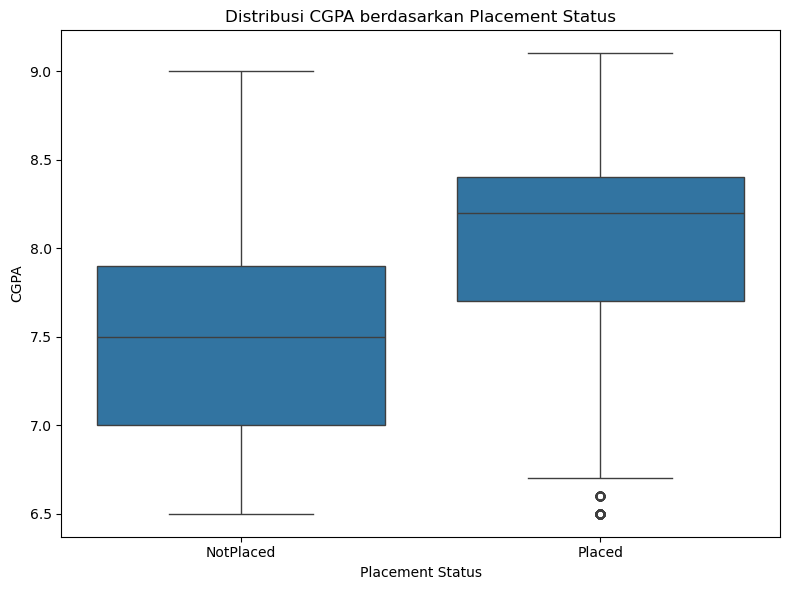

,PlacementStatus,Rata-rata CGPA
0,NotPlaced,7.467672
1,Placed,8.016488


In [12]:
# Visualisasi boxplot CGPA berdasarkan PlacementStatus
plt.figure(figsize=(8, 6))
sns.boxplot(x='PlacementStatus', y='CGPA', data=data)
plt.title("Distribusi CGPA berdasarkan Placement Status")
plt.xlabel("Placement Status")
plt.ylabel("CGPA")
plt.tight_layout()
plt.show()

# Hitung rata-rata CGPA per kelompok PlacementStatus
cgpa_means = data.groupby('PlacementStatus')['CGPA'].mean().reset_index()
cgpa_means.columns = ['PlacementStatus', 'Rata-rata CGPA']
cgpa_means

Hasil analisis menunjukkan bahwa mahasiswa dengan nilai akademik tinggi memiliki peluang kerja yang lebih besar, ditunjukkan oleh rata-rata `CGPA` kelompok dengan status **Placed** sebesar 8.02, lebih tinggi dibandingkan dengan kelompok dengan status **NotPlaced** yaitu 7.47. Sebaran nilai juga memperkuat temuan ini, di mana kelompok mahasiswa dengan status **Placed** memiliki distribusi CGPA yang lebih tinggi dan stabil dengan memiliki sebaran nilai yang lebih terkonsentrasi di sekitar nilai tinggi. Hal ini mengindikasikan bahwa performa nilai akademik memiliki kontribusi nyata terhadap keberhasilan mahasiswa dalam mendapatkan pekerjaan.

Dengan analisis ini kampus dan *Career Center* dapat memanfaatkan informasi untuk lebih dini mengidentifikasi mahasiswa dengan risiko rendahnya peluang mendapatkan kerja, khususnya mereka yang memiliki `CGPA` di bawah rata-rata. Dengan demikian, intervensi yang dilakukan bisa lebih tepat sasaran, seperti memberikan program pendampingan belajar, atau pelatihan tambahan. Sehingga pihak kampus dapat memetakan kebutuhan pengembangan mahasiswa secara lebih terukur. Analisis ini juga mendukung dalam perumusan strategi peningkatan daya saing lulusan, tidak hanya fokus pada aspek pelatihan, tetapi juga memperkuat nilai akademik sebagai bagian dari peningkatan *employability* secara menyeluruh.

## 2. Bagaimana perbandingan `PlacementStatus` antara mahasiswa yang mengikuti dan tidak mengikuti pelatihan pada `PlacementTraining`?

Analisis dilakukan guna mengidentifikasi pengaruh mahasiswa mengikuti pelatihan dengan mendapatkan pekerjaan agar pihak *Career Center* dapat meningkatkan efektivitas program pelatihan - pelatihan di kampus dalam mempersiapkan mahasiswa masuk dunia kerja.

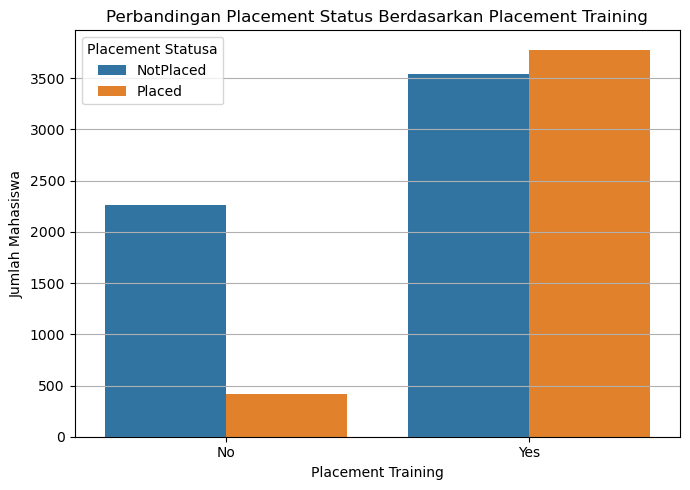

,PlacementTraining,Not Placed (%),Placed (%)
0,No,84.414616,15.585384
1,Yes,48.360208,51.639792


In [83]:
# Visualisasi perbandingan PlacementTraining terhadap PlacementStatus
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='PlacementTraining', hue='PlacementStatus')
plt.title("Perbandingan Placement Status Berdasarkan Placement Training")
plt.xlabel("Placement Training")
plt.ylabel("Jumlah Mahasiswa")
plt.legend(title="Placement Statusa")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Hitung proporsi yang placed berdasarkan training
training_impact = data.groupby('PlacementTraining')['PlacementStatus'].value_counts(normalize=True).unstack()
training_impact.columns = ['Not Placed (%)', 'Placed (%)']
training_impact *= 100 
training_impact.reset_index(inplace=True)
training_impact

Hasil menunjukkan adanya perbedaan yang sangat mencolok pada `PlacementStatus` antara mahasiswa yang mengikuti pelatihan dan yang tidak pada `PlacementTraining`. Dari hasil analisis, hanya sekitar 15,6% dari mahasiswa yang tidak mengikuti pelatihan berhasil mendapat pekerjaan, sementara sisanya sebesar 84,4% belum mendapat pekerjaan. Sebaliknya, pada kelompok mahasiswa yang mengikuti pelatihan, lebih dari setengahnya berhasil mendapat pekerjaan, yaitu sebesar 51,6%, dan sisanya 48,4% belum berhasil mendapat pekerjaan. Pola ini secara visual juga terlihat jelas pada diagram, di mana kelompok yang mengikuti pelatihan memiliki distribusi status yang lebih seimbang, dibandingkan kelompok yang tidak mengikuti pelatihan yang didominasi oleh status **NotPlaced**.

Temuan ini memberikan sinyal kuat bahwa mahasiswa yang mengikuti pelatihan pada `PlacementTraining` memiliki keterkaitan yang erat dalam keberhasilan mendapat pekerjaan sebab data yang tersedia menunjukkan bahwa mahasiswa yang mengikuti pelatihan memiliki peluang yang secara signifikan lebih tinggi untuk memperoleh pekerjaan. Oleh karena itu, program pelatihan ini dapat diposisikan sebagai salah satu intervensi strategis dalam upaya peningkatan *employability* lulusan. Pihak kampus dapat mempertimbangkan untuk memperluas cakupan pelatihan, menjadikannya sebagai program wajib, atau menyesuaikan kurikulumnya agar semakin relevan dengan kebutuhan industri. Selain itu, mahasiswa juga perlu didorong untuk lebih aktif mengikuti program pelatihan sebagai bentuk investasi kesiapan mereka menghadapi dunia kerja.

## 3. Bagaimana perbandingan status `PlacementStatus` antara mahasiswa yang aktif dan tidak aktif dalam kegiatan ekstrakurikuler pada `ExtracurricularActivities`?

Analisis dilakukan untuk menilai apakah keaktifan sosial dan organisasi yang diikuti oleh mahasiswa memberikan dampak dalam mendapatkan pekerjaaan.

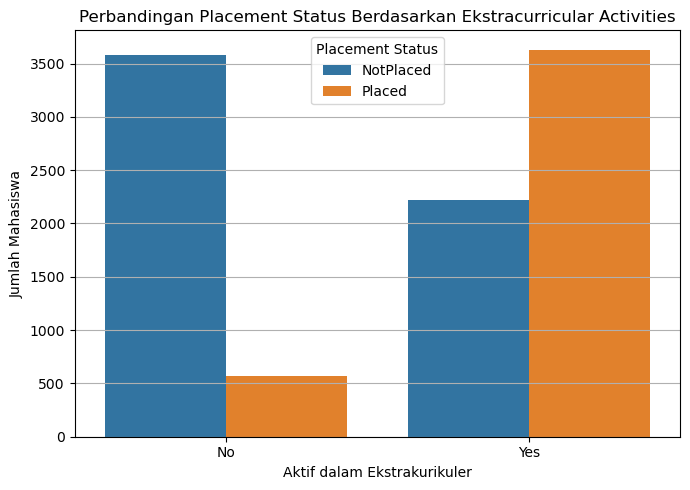

,ExtracurricularActivities,Not Placed (%),Placed (%)
0,No,86.324168,13.675832
1,Yes,37.991117,62.008883


In [84]:
# Visualisasi hubungan ExtracurricularActivities dan PlacementStatus
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='ExtracurricularActivities', hue='PlacementStatus')
plt.title("Perbandingan Placement Status Berdasarkan Ekstracurricular Activities")
plt.xlabel("Aktif dalam Ekstrakurikuler")
plt.ylabel("Jumlah Mahasiswa")
plt.legend(title="Placement Status")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Hitung proporsi placement berdasarkan keaktifan ekstrakurikuler
ekskul_impact = data.groupby('ExtracurricularActivities')['PlacementStatus'].value_counts(normalize=True).unstack()
ekskul_impact.columns = ['Not Placed (%)', 'Placed (%)']
ekskul_impact *= 100  # dalam persen
ekskul_impact.reset_index(inplace=True)
ekskul_impact

Hasil menunjukkan adanya perbedaan yang jelas pada `PlacementStatus` antara mahasiswa yang aktif dan tidak aktif dalam kegiatan ekstrakurikuler. Dari data proporsi, terlihat bahwa hanya sekitar 13,7% mahasiswa yang tidak mengikuti kegiatan ekstrakurikuler berhasil mendapat pekerjaan, sedangkan 62,0% dari mereka yang aktif dalam kegiatan tersebut berhasil mendapatkan pekerjaan. Sebaliknya, lebih dari 86% mahasiswa yang tidak aktif dalam kegiatan kampus belum berhasil mendapatkan pekerjaan. Grafik visualisasi juga menunjukkan bahwa kelompok "Yes" (aktif) memperlihatkan distribusi status penempatan yang jauh lebih baik dibandingkan kelompok "No" (tidak aktif).

Keikutsertaan dalam kegiatan ekstrakurikuler tampaknya menjadi faktor penting dalam meningkatkan peluang mendapat pekerjaan. Kegiatan seperti organisasi, kepanitiaan, atau komunitas kampus memberi kesempatan bagi mahasiswa untuk mengembangkan keterampilan interpersonal, kepemimpinan, dan kemampuan kolaborasi kompetensi yang sangat dibutuhkan di dunia kerja.

Oleh karena itu, pihak kampus maupun *Career Center* dapat mendorong keaktifan mahasiswa dalam kegiatan ekstrakurikuler sebagai bagian dari strategi pengembangan karier, dan tidak hanya berfokus pada aspek akademik dan pelatihan teknis saja. Hal ini dapat dilakukan melalui berbagai pendekatan, seperti menjadikan partisipasi organisasi sebagai bagian dari sistem penilaian atau SKPI (Surat Keterangan Pendamping Ijazah), memberikan insentif seperti beasiswa atau menyediakan pelatihan kepemimpinan berbasis kegiatan non-akademik, hingga memperluas wadah kegiatan mahasiswa melalui dukungan dana, ruang, dan kolaborasi dengan industri atau alumni. Dengan cara ini, keaktifan mahasiswa tidak hanya menjadi aktivitas tambahan, tetapi juga bagian strategis dari pembelajaran yang berdampak langsung terhadap kesiapan kerja lulusan.

## 4. Seberapa besar risiko tidak mendapatkan pekerjaan bagi mahasiswa yang **tidak mengikuti training** pada `PlacementTraining` dan **tidak aktif dalam kegiatan ekstrakurikuler** pada `ExtracurricularActivities`?

Analisis ini dilakukan guna mengidentifikasi profil mahasiswa yang pasif dan memiliki risiko tinggi untuk tidak mendapat pekerjaan agar pihak kampus dapat mengidentifikasi dan melakukan intervensi sedini mungkin.

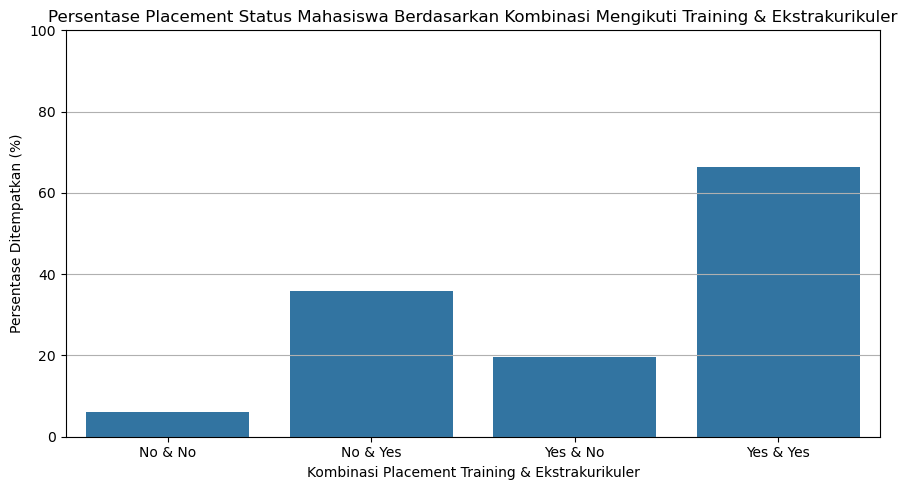

PlacementStatus                              NotPlaced     Placed
PlacementTraining ExtracurricularActivities                      
No                No                         93.921139   6.078861
                  Yes                        64.135514  35.864486
Yes               No                         80.344828  19.655172
                  Yes                        33.513405  66.486595

In [85]:
# Crosstab kombinasi 
cross_tab = pd.crosstab(
    index=[data['PlacementTraining'], data['ExtracurricularActivities']],
    columns=data['PlacementStatus'],
    normalize='index'
) * 100

cross_tab_reset = cross_tab.reset_index()
cross_tab_reset['Kombinasi'] = cross_tab_reset['PlacementTraining'] + ' & ' + cross_tab_reset['ExtracurricularActivities']

# Visualisasi
plt.figure(figsize=(9,5))
sns.barplot(
    data=cross_tab_reset,
    x='Kombinasi',
    y='Placed',
    order=['No & No', 'No & Yes', 'Yes & No', 'Yes & Yes']
)
plt.title("Persentase Placement Status Mahasiswa Berdasarkan Kombinasi Mengikuti Training & Ekstrakurikuler")
plt.ylabel("Persentase Ditempatkan (%)")
plt.xlabel("Kombinasi Placement Training & Ekstrakurikuler")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

cross_tab

Analisis kombinasi menunjukkan bahwa mahasiswa yang **tidak mengikuti pelatihan dan juga tidak aktif dalam kegiatan ekstrakurikuler memiliki risiko paling tinggi tidak mendapatkan pekerjaan**. Dalam kelompok ini, hanya sekitar 6% yang berhasil mendapatkan pekerjaan, sementara hampir 94% belum berhasil mendapatkan pekerjaan. Di sisi lain, mahasiswa yang mengikuti keduanya, baik pelatihan maupun kegiatan kampus memiliki tingkat keberhasilan dalam mendapat pekerjaan tertinggi, yakni lebih dari 66%. Hal ini menunjukkan bahwa keaktifan secara akademik dan non-akademik secara bersamaan memberikan dampak signifikan terhadap peluang mendapatkan pekerjaan. Temuan ini memperjelas pentingnya keterlibatan mahasiswa dalam ekosistem kampus secara menyeluruh. Kombinasi ketidakaktifan di dua aspek utama yaitu pelatihan dan kegiatan sosial dapat dijadikan indikator awal mahasiswa dengan risiko tinggi tidak mendapatkan pekerjaan. 

Pihak kampus maupun *Career Center* dapat menggunakan hasil ini dalam penyusunan strategi, seperti memprioritaskan mahasiswa dengan profil "No & No" dalam program pembinaan karier intensif, mentoring, atau pelatihan wajib sebagai upaya peningkatan daya saing lulusan secara terarah. Selain itu, kampus juga dapat mewajibkan keterlibatan minimal dalam satu kegiatan organisasi atau komunitas bagi mahasiswa dengan profil pasif ini, serta mengarahkan mereka ke program bimbingan karier yang bersifat individual maupun kelompok yang dirancang khusus untuk meningkatkan kesiapan kerja.

## 5. Bagaimana perbandingan status pada `PlacementStatus` berdasarkan jumlah pengalaman praktikal seperti `internships` dan `projects`?

Biasanya, pengalaman praktikal seperti internship dan project dianggap sebagai indikator penting dalam kesiapan kerja mahasiswa. Semakin banyak pengalaman ini, semakin besar kemungkinan mahasiswa memiliki pemahaman langsung terhadap dunia kerja. Oleh karena itu, analisis dilakukan untuk melihat apakah terdapat pola atau perbedaan signifikan pada `PlacementStatus` berdasarkan jumlah internship dan project.

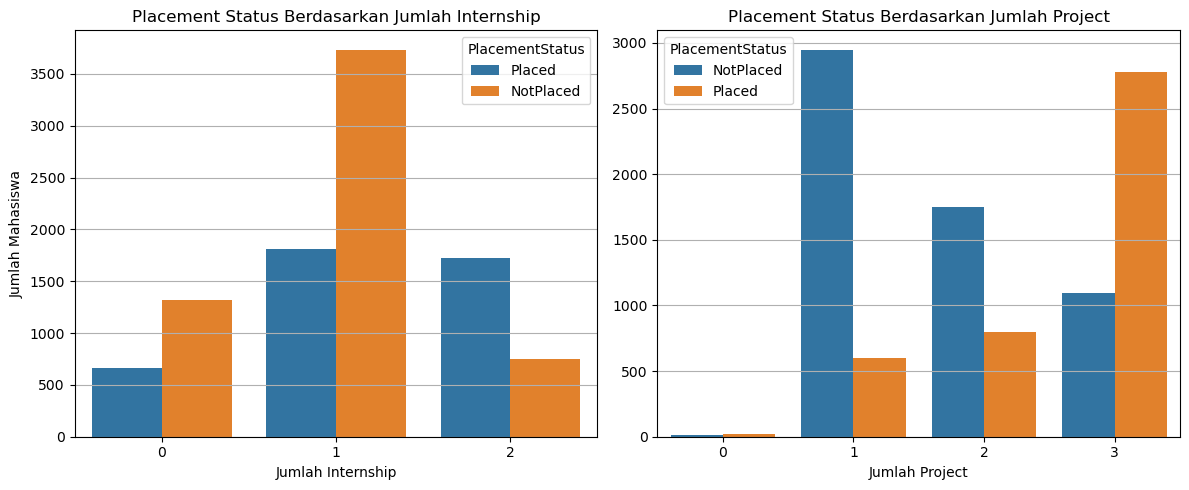

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot untuk Internships
sns.countplot(data=data, x='Internships', hue='PlacementStatus', ax=axes[0])
axes[0].set_title("Placement Status Berdasarkan Jumlah Internship")
axes[0].set_xlabel("Jumlah Internship")
axes[0].set_ylabel("Jumlah Mahasiswa")
axes[0].grid(axis='y')

# Plot untuk Projects
sns.countplot(data=data, x='Projects', hue='PlacementStatus', ax=axes[1])
axes[1].set_title("Placement Status Berdasarkan Jumlah Project")
axes[1].set_xlabel("Jumlah Project")
axes[1].set_ylabel("")
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

Mahasiswa dengan jumlah internship dan project yang lebih banyak menunjukkan peluang mendapatkan kerja yang lebih tinggi. Pada grafik sebelah kiri, terlihat bahwa mahasiswa yang memiliki dua internship lebih banyak ditempatkan kerja dibandingkan mereka yang hanya memiliki satu atau tidak sama sekali. Sementara itu, grafik sebelah kanan menunjukkan pola serupa pada jumlah project, mahasiswa dengan tiga proyek memiliki jumlah mahasiswa dengan status **Placed** tertinggi dibandingkan yang hanya memiliki satu atau dua. Ini menandakan bahwa pengalaman praktikal, baik dalam bentuk internship maupun project, memiliki peran penting dalam keberhasilan mendapatkan pekerjaan.

Temuan ini menegaskan pentingnya memperluas kesempatan bagi mahasiswa untuk mendapatkan pengalaman langsung di luar ruang kelas. Pihak kampus maupun *Career Center* dapat menggunakan hasil ini dengan memperluas kemitraan industri untuk menyediakan lebih banyak slot magang, mendorong integrasi proyek berbasis dunia nyata ke dalam kurikulum, serta menciptakan sistem penilaian yang mengapresiasi pengalaman tersebut. Dengan membekali mahasiswa melalui pengalaman aplikatif, lulusan tidak hanya siap secara teori, tetapi juga lebih kompetitif di pasar kerja.

## 6. Apa ciri umum mahasiswa yang belum mendapatkan pekerjaan? (Profil risiko tinggi)

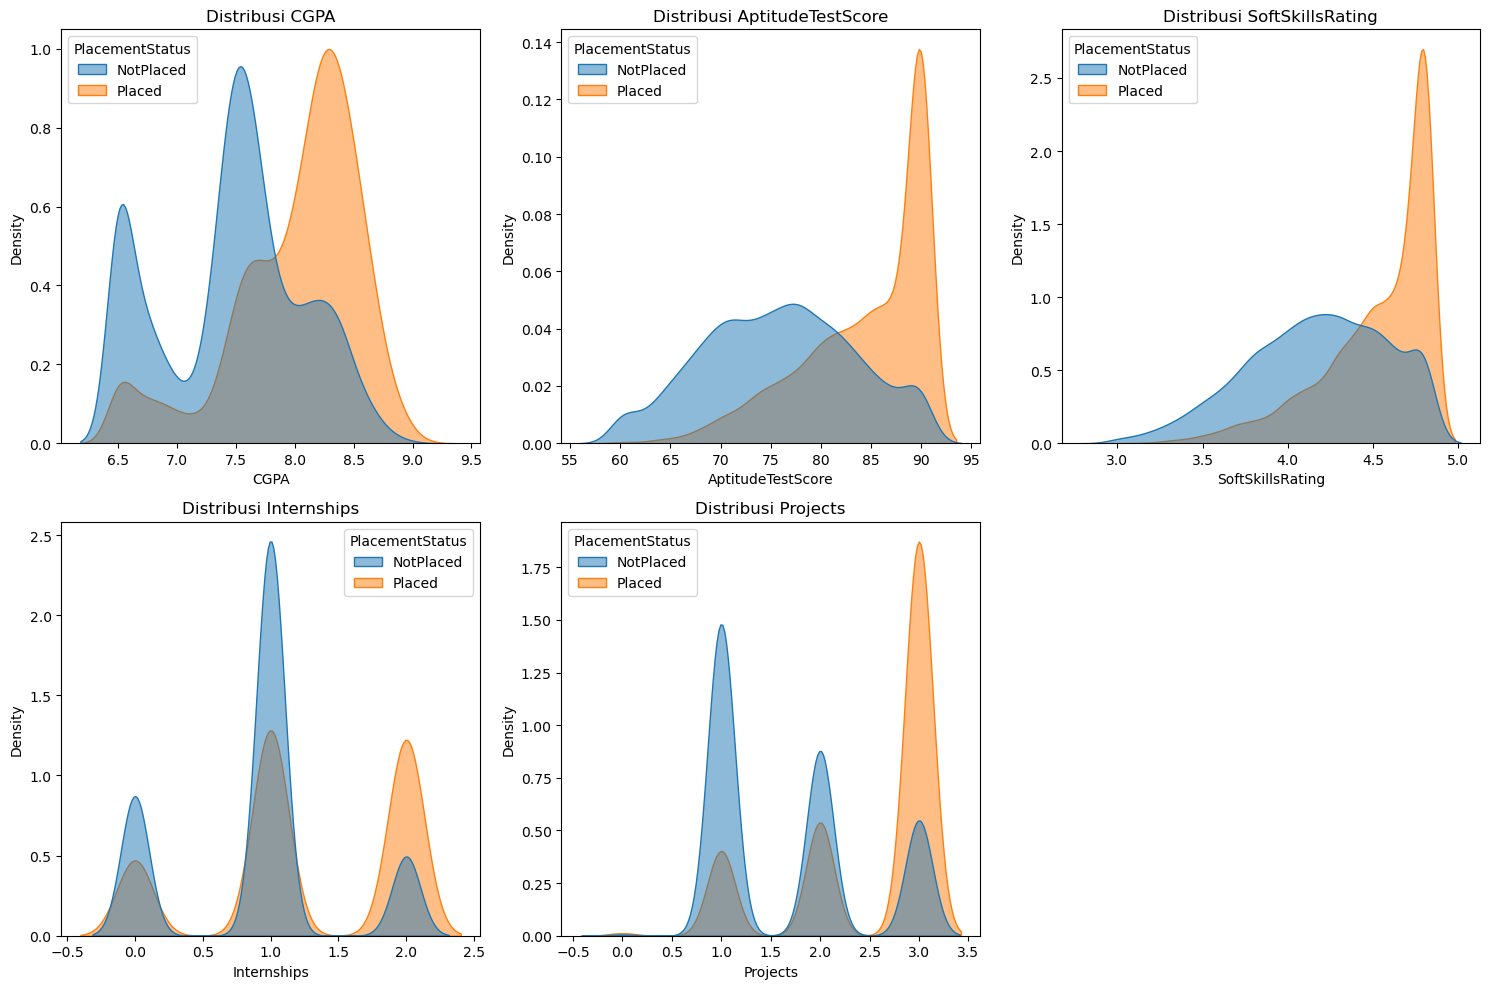

In [17]:
# Pilih fitur yang relevan
fitur_penting = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'Internships', 'Projects']

# Buat plot distribusi
plt.figure(figsize=(15, 10))
for i, col in enumerate(fitur_penting):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=data, x=col, hue='PlacementStatus', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

Untuk menganalisis profil risiko tinggi mahasiswa yang tidak mendapatkan pekerjaan, digunakan lima fitur utama yaitu `CGPA`, `AptitudeTestScore`, `SoftSkillsRating`, `Internships`, dan `Projects`. Kelima fitur ini dipilih karena paling relevan dengan proses rekrutmen kerja di dunia industri. Visualisasi distribusi (KDE plot) digunakan karena mampu menunjukkan pola penyebaran nilai dari masing-masing fitur berdasarkan status pada `Placement Status`. 

Dengan pendekatan ini, terlihat bahwa mahasiswa dengan status **Not Placed** cenderung memiliki CGPA di bawah 8.0, skor aptitude di bawah 80, serta soft skill rating yang lebih rendah. Mereka juga cenderung memiliki pengalaman internship dan proyek yang lebih sedikit dibandingkan kelompok dengan status **Placed**. Pola ini menunjukkan bahwa kegagalan ditempatkan bukan disebabkan oleh satu faktor tunggal, melainkan kombinasi kekurangan dari berbagai aspek kesiapan kerja.

Dalam penerapan strategi *Career Center*, hasil ini menunjukkan perlunya intervensi terhadap mahasiswa dengan profil risiko tinggi. Mahasiswa dengan kombinasi skor rendah pada fitur-fitur tersebut perlu diikutsertakan dalam program peningkatan keterampilan seperti pelatihan soft skill, bimbingan proyek, dan pembekalan internship. Dengan memfokuskan pendampingan pada kelompok ini, institusi dapat meningkatkan tingkat penempatan kerja lulusan secara signifikan dan lebih tepat sasaran.

## 7. Apakah terdapat ambang nilai tertentu pada `CGPA`, `SoftSkillRating`, atau `AptitudeTestScore` yang secara signifikan meningkatkan peluang mendapatkan kerja?

Biasanya, terdapat ambang batas atau "cut-off point" pada nilai akademik dan keterampilan yang menjadi pertimbangan utama dalam proses rekrutmen. Nilai seperti CGPA, SoftSkillRating, dan AptitudeTestScore sering dijadikan tolok ukur untuk menyaring kandidat yang dianggap kompeten secara akademis dan interpersonal. Oleh karena itu, analisis ini dilakukan untuk mengidentifikasi apakah terdapat titik kritis tertentu di mana peluang mahasiswa untuk mendapatkan pekerjaan meningkat secara signifikan. 

C:\Users\USER\AppData\Local\Temp\ipykernel_11632\2094507953.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(binned)['PlacementStatus']
C:\Users\USER\AppData\Local\Temp\ipykernel_11632\2094507953.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(binned)['PlacementStatus']
C:\Users\USER\AppData\Local\Temp\ipykernel_11632\2094507953.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.

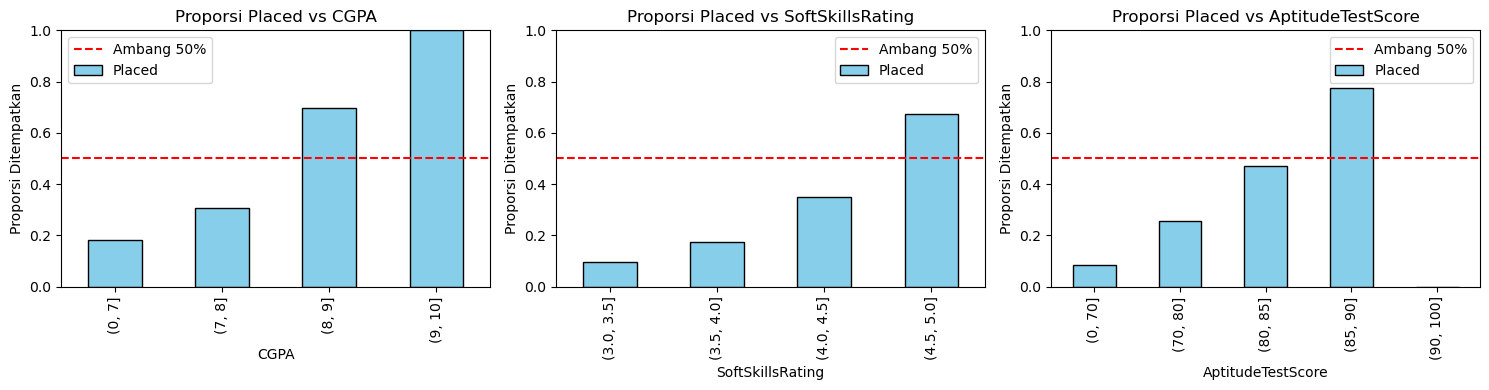

In [18]:
# Tentukan bin untuk masing-masing fitur berdasarkan distribusi data
threshold_bins = {
    'CGPA': [0, 7, 8, 9, 10],
    'SoftSkillsRating': [3.0, 3.5, 4.0, 4.5, 5.0],
    'AptitudeTestScore': [0, 70, 80, 85, 90, 100]
}

# Buat visualisasi
plt.figure(figsize=(15, 4))

for i, (feature, bins) in enumerate(threshold_bins.items()):
    # Binning secara sementara (tanpa membuat kolom di data)
    binned = pd.cut(data[feature], bins=bins)

    # Hitung proporsi penempatan per bin
    proporsi = (
        data.groupby(binned)['PlacementStatus']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    # Plot
    plt.subplot(1, 3, i+1)
    proporsi['Placed'].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Proporsi Placed vs {feature}')
    plt.ylabel('Proporsi Ditempatkan')
    plt.xlabel(f'{feature}')
    plt.ylim(0, 1)
    plt.axhline(0.5, color='red', linestyle='--', label='Ambang 50%')
    plt.legend()

plt.tight_layout()
plt.show()

Untuk mengetahui nilai ambang yang berpengaruh terhadap peluang mendapat pekerjaan, dilakukan analisis proporsi mahasiswa yang mendapatkan pekerjaan berdasarkan interval nilai (bin) dari tiga fitur utama yaitu `CGPA`, `AptitudeTestScore`, dan `SoftSkillsRating`. Ketiga fitur ini dipilih karena mewakili dimensi penting dalam kesiapan kerja, yakni kemampuan akademik, kognitif, dan interpersonal. Ambang 50% digunakan sebagai batas acuan, yaitu titik di mana lebih dari separuh mahasiswa dalam kelompok nilai tersebut berhasil mendapatkan pekerjaan. 

Hasil analisis menunjukkan bahwa peluang mendapatkan pekerjaan mulai meningkat signifikan ketika `CGPA` berada di atas 8.0, `AptitudeTestScore` melebihi 85, dan `SoftSkillsRating` rating mencapai di atas 4.5. Hasil ini dapat memberikan dasar yang kuat dalam perencanaan strategi. *Career Center* dapat mengidentifikasi mahasiswa dengan nilai di bawah ambang tersebut sebagai kelompok dengan potensi berisiko tinggi, lalu mengarahkan mereka ke program dukungan seperti pelatihan akademik, simulasi aptitude test, dan pengembangan soft skill. Dengan fokus pada ambang kritis ini, pihak kampus dapat membuat kebijakan pembinaan yang lebih terukur, efisien, dan berdampak langsung terhadap peningkatan *employability* lulusan.

# **Feature Engineering**

Dilakukan duplicate dataset untuk menjaga data asli.

In [19]:
#duplicated dataset
df = data.copy()

## Cek cardinality

In [20]:
# Cek cardinality untuk kolom-kolom kategorikal
cardinality = df[cat_list].nunique().sort_values()
cardinality

ExtracurricularActivities    2
PlacementTraining            2
dtype: int64

Kedua fitur kategorikal memiliki cardinality rendah (2 kategori), sehingga aman untuk digunakan dalam model tanpa perlu praproses tambahan.

## Cek Outlier

In [21]:
# Cek Skew 
df[num_list].skew()

StudentID                   0.000000
CGPA                       -0.402713
Internships                -0.055429
Projects                   -0.078830
Workshops/Certifications    0.204570
AptitudeTestScore          -0.355011
SoftSkillsRating           -0.676326
SSC_Marks                   0.034382
HSC_Marks                  -0.000985
dtype: float64

Dari hasil pengecekan nilai skew akan akan digunakan Tukey’s Rule (IQR) hanya untuk `SoftSkillsRating` karena hanya kolom tersebut yang memiliki distribusi tidak normal (skew ke kiri). Sementara Semua fitur lainnya (`CGPA`, `Internships`, `Projects`, `Workshops/Certifications`, `AptitudeTestScore`, `SSC_Marks`, `HSC_Marks`) akan digunakan Z-Score karena skewness berada dalam rentang normal.Untuk fitur `StudentId` tidak dilakukan pengecekan sebab tidak relevan (bukan fitur numerik untuk analisis).

In [22]:
# Tentukan kolom dan nilai skewness-nya
skewness_values = {
    'SoftSkillsRating': -0.676326,
    'CGPA': -0.402713,
    'AptitudeTestScore': -0.355011,
    'Workshops/Certifications': 0.204570,
    'SSC_Marks': 0.034382,
    'HSC_Marks': -0.000985,
    'Internships': -0.055429,
    'Projects': -0.078830
}

# Inisialisasi hasil
outlier_counts = {}

# Loop untuk setiap fitur dan tentukan metode berdasarkan skewness
for col, skew in skewness_values.items():
    values = df[col]
    
    if abs(skew) > 0.5:
        # Gunakan Tukey’s Rule (IQR)
        Q1 = values.quantile(0.25)
        Q3 = values.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = values[(values < lower) | (values > upper)]
        method = "Tukey (IQR)"
    else:
        # Gunakan Z-Score
        z_scores = (values - values.mean()) / values.std()
        outliers = values[(np.abs(z_scores) > 3)]
        method = "Z-Score"

    outlier_counts[col] = {
        'Method': method,
        'Total Outliers': outliers.count(),
        'Outlier Values': sorted(outliers.unique())
    }

outlier_check_df = pd.DataFrame(outlier_counts).T
outlier_check_df

,Method,Total Outliers,Outlier Values
SoftSkillsRating,Tukey (IQR),0,[]
CGPA,Z-Score,0,[]
AptitudeTestScore,Z-Score,0,[]
Workshops/Certifications,Z-Score,0,[]
SSC_Marks,Z-Score,0,[]
HSC_Marks,Z-Score,0,[]
Internships,Z-Score,0,[]
Projects,Z-Score,0,[]


Berdasarkan hasil deteksi dengan menggunakan kedua metode tersebut, tidak ditemukan adanya outlier pada fitur-fitur yang dianalisis. Seluruh nilai data berada dalam batas wajar, baik dari segi sebaran kuartil maupun deviasi standar. Temuan ini menunjukkan bahwa dataset dalam kondisi bersih dan siap digunakan untuk tahap analisis atau pemodelan tanpa perlu penanganan khusus terhadap nilai ekstrem.

## Split feature dan target

In [23]:
# Split feature dengan target
x = df.drop(columns='PlacementStatus')
y = df['PlacementStatus'].map({'NotPlaced': 0, 'Placed': 1})

Kolom `PlacementStatus` di drop sebab merupakan target.

## Split train dan test

In [24]:
# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    x, y,                      # Fitur dan target
    test_size=0.2,             # 20% untuk data test
    random_state=42,           # Agar hasil konsisten 
    stratify=y                 # Agar proporsi target seimbang di train dan test
)

print('Train size : ', x_train.shape)
print('Test size  : ', x_test.shape)

Train size :  (8000, 11)
Test size  :  (2000, 11)


Pada tahap pemisahan data, digunakan proporsi 80% untuk data latih dan 20% untuk data uji guna memastikan bahwa model memiliki cukup informasi untuk belajar sekaligus diuji secara adil. Parameter `stratify=y` ditambahkan dalam proses ini untuk memastikan distribusi **Placed** / **NotPlaced** seimbang di train dan test set, hal ini penting karena target memiliki sedikit ketidakseimbangan proporsi, dan tanpa stratifikasi, pembagian acak dapat menyebabkan ketimpangan distribusi antara data train dan test. 

## Split numerical and categorical

In [ ]:
# Mengambil kolom numerik dan kategorik
num_columns = x_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = x_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
Categorical Columns :  ['ExtracurricularActivities', 'PlacementTraining']


In [ ]:
# Split kolom numerik dan kategorik
x_train_num = x_train[num_columns]
x_test_num = x_test[num_columns]

x_train_cat = x_train[cat_columns]
x_test_cat = x_test[cat_columns]

x_train_num.head(2)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
8944,8945,6.7,1,1,0,75,3.7,58,66
5241,5242,8.4,1,3,0,90,4.6,78,87


In [27]:
x_train_cat.head(2)

,ExtracurricularActivities,PlacementTraining
8944,No,No
5241,Yes,Yes


## Feature Selection

Pada proses feature selection, digunakan metode **Kendall’s Tau** untuk fitur numerik dan **Chi-Squared Test** untuk fitur kategorikal. Pemilihan metode ini disesuaikan dengan karakteristik data dan target yang digunakan. Meskipun target `PlacementStatus` telah dikonversi ke bentuk numerik biner (0 untuk **NotPlaced** dan 1 untuk **Placed**), secara statistik target tersebut tetap bersifat kategorikal, karena hanya terdiri dari dua kelas diskret dan bukan variabel kontinu. Oleh karena itu, Kendall’s Tau dipilih untuk mengukur kekuatan hubungan monotonic antara fitur numerik dan target biner tanpa mengasumsikan distribusi normal, metode ini sangat cocok untuk fitur yang memiliki distribusi miring. Sementara itu, Chi-Squared digunakan untuk fitur kategorikal karena mampu mengevaluasi hubungan antar variabel kategorikal dengan target.

In [28]:
# Kendall untuk numerikal
kendall_cols = []
kendall_interpretasi = []

for col in x_train_num:
    coef, pval = kendalltau(x_train_num[col], y_train)
    kendall_cols.append(col)
    if pval < 0.05:
        kendall_interpretasi.append('ada korelasi')
    else:
        kendall_interpretasi.append('tidak ada korelasi')

kendall_df = pd.DataFrame({
    'nama kolom': kendall_cols,
    'hasil': kendall_interpretasi
})

kendall_df


,nama kolom,hasil
0,StudentID,tidak ada korelasi
1,CGPA,ada korelasi
2,Internships,ada korelasi
3,Projects,ada korelasi
4,Workshops/Certifications,ada korelasi
5,AptitudeTestScore,ada korelasi
6,SoftSkillsRating,ada korelasi
7,SSC_Marks,ada korelasi
8,HSC_Marks,ada korelasi


In [29]:
# Chi-Squared untuk kategorikal
chi2_cols = []
chi2_interpretasi = []

for col in x_train_cat:
    contingency_table = pd.crosstab(x_train_cat[col], y_train)
    chi2_stat, pval, _, _ = chi2_contingency(contingency_table)
    chi2_cols.append(col)
    if pval < 0.05:
        chi2_interpretasi.append('ada korelasi')
    else:
        chi2_interpretasi.append('tidak ada korelasi')

chi2_df = pd.DataFrame({
    'nama kolom': chi2_cols,
    'hasil': chi2_interpretasi
})

chi2_df

,nama kolom,hasil
0,ExtracurricularActivities,ada korelasi
1,PlacementTraining,ada korelasi


Hasil analisis menunjukkan bahwa hampir semua fitur numerik memiliki korelasi yang signifikan terhadap target, kecuali `StudentID` tidak memiliki korelasi, dan seharusnya memang dikeluarkan karena hanya berfungsi sebagai identifier. Kedua fitur kategorikal (`PlacementTraining` dan `ExtracurricularActivities`) juga menunjukkan hubungan yang signifikan terhadap `PlacementStatus`. Oleh karena itu, fitur `StudentID` akan dikeluarkan dari proses modeling, sementara fitur-fitur lain akan digunakan dalam tahap selanjutnya karena terbukti relevan terhadap outcome.

In [30]:
#Drop column 'StudentID'
x_train_num.drop('StudentID', axis = 1, inplace = True)
x_test_num.drop('StudentID', axis = 1, inplace = True)
x_train_num

C:\Users\USER\AppData\Local\Temp\ipykernel_11632\436388497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_num.drop('StudentID', axis = 1, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11632\436388497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_num.drop('StudentID', axis = 1, inplace = True)


,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
8944,6.7,1,1,0,75,3.7,58,66
5241,8.4,1,3,0,90,4.6,78,87
5725,7.0,1,2,0,69,4.7,57,65
979,6.6,1,2,0,88,4.0,78,67
8273,6.7,1,1,0,74,3.5,65,62
...,...,...,...,...,...,...,...,...
9201,6.5,0,3,0,85,4.3,55,70
6509,6.6,1,1,1,81,4.0,55,66
2804,7.4,1,1,1,77,4.1,55,64
776,8.1,0,3,2,90,4.2,69,88


Kolom `StudentID` berhasil di drop.

In [ ]:
# Gabung kembali fitur numerik dan kategorik
x_train = pd.concat([x_train_num, x_train_cat], axis=1)
x_test = pd.concat([x_test_num, x_test_cat], axis=1)

In [ ]:
# Kolom numerical dan kategorikal fix 
num_cols = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
cat_cols = ['ExtracurricularActivities', 'PlacementTraining']

## Column Transformer

In [33]:
# Membuat column Transformer
transformer = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

Digunakan **ColumnTransformer** untuk menangani dua jenis fitur secara terpisah sesuai dengan karakteristik data. Fitur numerik diproses menggunakan **StandardScaler** sebab fitur numerik dalam dataset memiliki skala yang sangat bervariasi, seperti `AptitudeTestScore` yang berada dalam rentang hingga 100, sementara `CGPA` hanya berkisar antara 6 hingga 10. Perbedaan skala ini dapat menyebabkan ketidakseimbangan kontribusi antar fitur saat proses *training* model, sehingga diperlukan standarisasi agar seluruh fitur numerik berada dalam skala yang seragam. 

Sementara itu, fitur kategorikal diproses menggunakan **OneHotEncoder** dengan opsi `drop='first'` untuk menghindari multikolinearitas, yaitu kondisi ketika dua kolom memiliki hubungan linier sempurna dan menyebabkan ketidakstabilan pada model. Penambahan parameter `handle_unknown='ignore'` juga dilakukan untuk memastikan pipeline tetap berjalan meskipun ditemukan kategori baru yang tidak ada dalam data training. Dengan pendekatan ini, preprocessing dilakukan secara rapi, terstruktur, dan aman untuk digunakan dalam pipeline pemodelan tanpa risiko data leakage atau inkonsistensi format.

# **Modelling Part 1**

Pada tahap ini, dilakukan pembangunan beberapa model baseline klasifikasi menggunakan parameter default untuk memperoleh gambaran awal performa dari masing-masing algoritma nantinya setelah dievaluasi, model dengan performa terbaik akan dilanjutkan ke tahap hyperparameter tuning untuk mengoptimalkan hasilnya.
. Model-model yang digunakan mencakup **KNeighborsClassifier**, **Support Vector Classifier (SVC)**, **DecisionTreeClassifier**, **RandomForestClassifier**, dan **GradientBoostingClassifier**.

Karena fokus utama dari proyek ini adalah mengidentifikasi mahasiswa yang benar-benar tidak mendapatkan pekerjaan (`NotPlaced`), maka akan diprioritaskan menghindari **false negative**, yaitu kasus ketika model memprediksi **Placed** padahal sebenarnya **NotPlaced**. Dalam konteks intervensi karier, false negative bisa berdampak serius, karena mahasiswa berisiko bisa luput dari perhatian *Career Center*, sehingga tidak mendapatkan pembinaan yang tepat waktu. Oleh karena itu, recall terhadap kelas NotPlaced menjadi metrik utama yang diprioritaskan dalam proses evaluasi.

Untuk mendukung penilaian performa model secara menyeluruh, evaluasi dilakukan dengan menggunakan cross-validation berbasis ROC-AUC, yang berfungsi untuk mengukur rata-rata dan kestabilan performa model dalam memisahkan dua kelas secara probabilistik di berbagai subset data. Penggunaan ROC-AUC score juga memungkinkan penilaian kualitas model tanpa bergantung pada threshold tertentu, yang sangat berguna dalam konteks klasifikasi yang sensitif seperti ini. Dengan pendekatan ini, model yang tidak hanya akurat, tetapi juga stabil dan responsif terhadap kelas risiko tinggi dapat diidentifikasi secara objektif.


## **KNN (KNeighborsClassifier)**

Algoritma K-Nearest Neighbors Classifier (KNN) dipilih sebagai salah satu baseline model karena sifatnya yang sederhana, non-parametrik, dan cocok digunakan untuk klasifikasi biner seperti dalam kasus ini, memprediksi apakah mahasiswa akan **Placed** atau **NotPlaced**. KNC bekerja berdasarkan prinsip bahwa data baru akan diklasifikasikan berdasarkan kemiripannya (jarak) dengan sejumlah tetangga terdekat di data latih. Karena data telah melalui proses standarisasi numerik menggunakan StandardScaler, maka penggunaan KNN menjadi valid dan efektif, mengingat KNN sangat bergantung pada perhitungan jarak Euclidean antar fitur.

### Model Definition

In [34]:
# Define KNN pipeline
knn_pipeline = Pipeline([
    ('prep', transformer),
    ('knc', KNeighborsClassifier())
])

knn_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('knc', KNeighborsClassifier())])

### Model Training

In [35]:
# Train model
knn_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('knc', KNeighborsClassifier())])

### Model Evaluation

#### Cross Validation

In [36]:
# Menghitung nilai Cross Validation
cv_scores = cross_val_score(knn_pipeline, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Mean Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Mean Cross Validation: 0.829
Nilai Standard Deviasi Cross Validation: 0.011


**Mean 0.829**  : Menunjukkan bahwa model mampu memisahkan kelas `Placed` dan `NotPlaced` dengan baik, di berbagai threshold.

**Std dev 0.011**   : Sangat kecil, berarti model stabil, dan tidak tergantung pada subset data tertentu selama training (cross-validation).

Model menunjukkan performa yang sangat baik dalam tahap evaluation cross-validation, dengan nilai mean sebesar 0.829 dan standard deviasi sebesar 0.011. Menandakan bahwa model tidak hanya mampu memisahkan kelas secara akurat, tetapi juga konsisten saat diuji pada berbagai subset data. Stabilitas ini menjadi nilai tambah penting dalam konteks prediksi *employability*, karena menunjukkan bahwa model tidak overfit dan dapat diandalkan saat digunakan pada data baru.

In [37]:
## Inisialisasi dictionary untuk menyimpan hasil CV dari semua model
cross_val = {
    'Model': [],
    'Nilai Rata-Rata CV': [],
    'Nilai Standard Deviasi CV': []
}

## Tambahkan hasil evaluasi KNN ke dalam dictionary
cross_val['Model'].append('KNC')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

## Tampilkan sebagai DataFrame
cv_result_df = pd.DataFrame(cross_val)
cv_result_df

,Model,Nilai Rata-Rata CV,Nilai Standard Deviasi CV
0,KNC,0.829,0.011


#### Classification Report

In [38]:
# Prediksi pada data train
y_pred_train_knn = knn_pipeline.predict(x_train)
print("\nClassification Report - KNN (Train Set):")
print(classification_report(y_train, y_pred_train_knn, target_names=['NotPlaced', 'Placed']))

# Prediksi pada data test
y_pred_test_knn = knn_pipeline.predict(x_test)
print("\nClassification Report - KNN (Test Set):")
print(classification_report(y_test, y_pred_test_knn, target_names=['NotPlaced', 'Placed']))


Classification Report - KNN (Train Set):
              precision    recall  f1-score   support

   NotPlaced       0.85      0.86      0.86      4642
      Placed       0.81      0.79      0.80      3358

    accuracy                           0.83      8000
   macro avg       0.83      0.83      0.83      8000
weighted avg       0.83      0.83      0.83      8000


Classification Report - KNN (Test Set):
              precision    recall  f1-score   support

   NotPlaced       0.81      0.81      0.81      1161
      Placed       0.73      0.73      0.73       839

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



Berdasarkan hasil evaluasi, model KNN ini berhasil menangkap kelas `NotPlaced` dengan cukup baik, ditunjukkan oleh nilai recall sebesar 81% di data test dan 86% di data train, dengan penurunan yang wajar sebesar 5%. Ini menunjukkan bahwa model tidak mengalami overfitting dan mampu generalisasi dengan baik. Dengan keseimbangan nilai precision, recall, dan f1-score yang cukup stabil di kedua kelas, model KNN ini dapat dikatakan sebagai model baseline yang **good fit**.

#### ROC - AUC Score

Nilai AUC Train: 0.918
Nilai AUC Test: 0.84


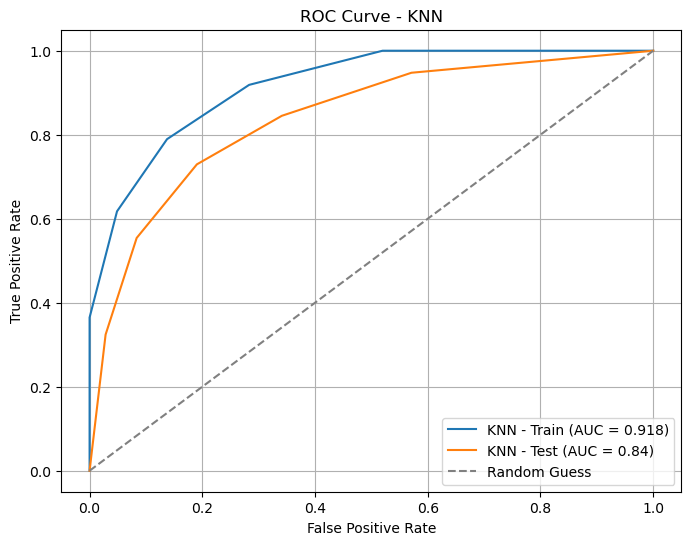

In [39]:
## Buat fungsi untuk menghitung FPR, TPR, dan AUC
def roc_auc_calc(model, X, y):
    y_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba)
    auc = roc_auc_score(y, y_proba)
    return fpr, tpr, round(auc, 3)

# Hitung nilai ROC-AUC train dan test
fpr_train, tpr_train, auc_train = roc_auc_calc(knn_pipeline, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(knn_pipeline, x_test, y_test)

# Tampilkan nilai
print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Plot grafik ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'KNN - Train (AUC = {auc_train})')
plt.plot(fpr_test, tpr_test, label=f'KNN - Test (AUC = {auc_test})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Visualisasi ROC Curve menunjukkan bahwa model KNN mampu membedakan kelas `Placed` dan `NotPlaced` dengan baik, ditunjukkan oleh kurva yang jauh di atas garis diagonal. Perbandingan antara ROC-AUC di data train (0.84+) dan test (0.84) juga menunjukkan bahwa model stabil dan tidak overfit.

## **SVC (Super Vector Clasificattion)**

Algoritma Support Vector Classifier (SVC) dipilih sebagai salah satu baseline model karena kemampuannya yang baik dalam menangani masalah klasifikasi biner, seperti kasus prediksi *employability* apakah mahasiswa akan **Placed** atau **NotPlaced**. SVC bekerja dengan mencari hyperplane optimal yang memisahkan dua kelas dengan margin terbesar. Dengan kata lain, SVC berusaha menemukan batas pemisah terbaik agar prediksi lebih akurat dan generalis. Algoritma ini cukup fleksibel, karena dapat bekerja dengan data linier maupun non-linier melalui penggunaan kernel. Dalam kasus ini, data telah melalui proses standarisasi numerik menggunakan StandardScaler, yang sangat penting untuk SVC karena model ini sangat sensitif terhadap skala fitur. Oleh karena itu, penggunaan SVC dalam pipeline yang sudah distandarisasi memberikan dasar yang kuat untuk mengevaluasi performa model ini dalam mengidentifikasi mahasiswa yang berisiko tidak mendapatkan pekerjaan.

### Model Definition

In [40]:
# Define SVC pipeline
svc_pipeline = Pipeline([
    ('prep', transformer),          
    ('svc', SVC(probability=True))  
])

svc_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('svc', SVC(probability=True))])

### Model Training

In [41]:
# Train model
svc_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('svc', SVC(probability=True))])

### Model Evaluation

#### Cross Validation

In [42]:
# Menghitung nilai CV
cv_scores = cross_val_score(svc_pipeline, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Mean Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

## Tambahkan hasil evaluasiSVC ke dalam dictionary
cross_val['Model'].append('SVC')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

## Tampilkan sebagai DataFrame
cv_result_df = pd.DataFrame(cross_val)
cv_result_df

Nilai Mean Cross Validation: 0.851
Nilai Standard Deviasi Cross Validation: 0.007


,Model,Nilai Rata-Rata CV,Nilai Standard Deviasi CV
0,KNC,0.829,0.011
1,SVC,0.851,0.007


**Mean 0.851**  : menunjukkan bahwa model SVC mampu membedakan dengan sangat baik antara kelas **Placed** dan **NotPlaced**, bahkan di berbagai threshold keputusan. Ini mengindikasikan kualitas prediksi probabilitas yang tinggi, serta kemampuan pemisahan kelas yang solid.

**Standard deviation 0.007**    : sangat kecil, menandakan bahwa model memiliki konsistensi tinggi di seluruh fold cross-validation, dan tidak sensitif terhadap variasi subset data pelatihan.

Secara keseluruhan, model SVC menunjukkan performa yang sangat baik dalam tahap cross-validation, dengan nilai mean sebesar 0.851 dan standard deviasi sebesar 0.007. Ini menandakan bahwa model tidak hanya mampu melakukan klasifikasi dengan akurat, tetapi juga stabil dan tidak overfit sehingga bisa dikatakan bahwa model ini memiliki performa yang **good fit**.

#### Clasification Report

In [43]:
# Prediksi pada data train
y_pred_train_svc = svc_pipeline.predict(x_train)
print("\nClassification Report - SVC (Train Set):")
print(classification_report(y_train, y_pred_train_svc, target_names=['NotPlaced', 'Placed']))

# Prediksi pada data test
y_pred_test_svc = svc_pipeline.predict(x_test)
print("\nClassification Report - SVC (Test Set):")
print(classification_report(y_test, y_pred_test_svc, target_names=['NotPlaced', 'Placed']))


Classification Report - SVC (Train Set):
              precision    recall  f1-score   support

   NotPlaced       0.83      0.85      0.84      4642
      Placed       0.78      0.75      0.77      3358

    accuracy                           0.81      8000
   macro avg       0.81      0.80      0.80      8000
weighted avg       0.81      0.81      0.81      8000


Classification Report - SVC (Test Set):
              precision    recall  f1-score   support

   NotPlaced       0.82      0.84      0.83      1161
      Placed       0.77      0.75      0.76       839

    accuracy                           0.80      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



Model Support Vector Classifier (SVC) menunjukkan performa yang stabil dan cukup seimbang antara data training dan testing.

- Pada data train, accuracy 81% dengan recall untuk **NotPlaced** sebesar 85%, sedangkan

- Pada data test, accuracy tetap kuat di 80%, dan recall kelas **NotPlaced** hanya sedikit turun menjadi 84%.

Nilai precision dan f1-score untuk kedua kelas (**NotPlaced** dan **Placed**) juga menunjukkan konsistensi antara train dan test set, dengan hanya penurunan ringan sekitar 1–2 poin. Berdasarkan perbandingan antara train dan test, model SVC dapat dikatakan **good fit**. Model menunjukkan kemampuan generalisasi yang sangat baik, dengan performa stabil dan andal, khususnya dalam mendeteksi mahasiswa dengan kelas **NotPlaced**, yaitu fokus utama dari proyek *employability* ini.

#### ROC - AUC Score

Nilai AUC Train: 0.875
Nilai AUC Test: 0.864


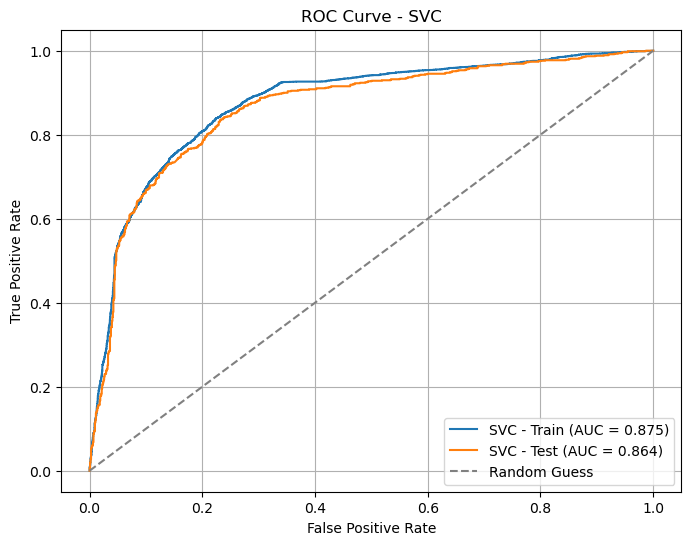

In [44]:
# Hitung nilai ROC-AUC train dan test
fpr_train, tpr_train, auc_train = roc_auc_calc(svc_pipeline, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(svc_pipeline, x_test, y_test)

# Tampilkan nilai
print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Plot grafik ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'SVC - Train (AUC = {auc_train})')
plt.plot(fpr_test, tpr_test, label=f'SVC - Test (AUC = {auc_test})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Nilai ROC-AUC model SVC sebesar 0.875 pada data train dan 0.864 pada data test menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam memisahkan antara mahasiswa Placed dan NotPlaced. Nilai yang tinggi dan konsisten di kedua set ini menandakan bahwa model tidak hanya belajar dengan baik dari data pelatihan, tetapi juga mampu menggeneralisasi secara efektif pada data baru.

Perbedaan nilai AUC yang sangat kecil (hanya 1.1%) antara train dan test menunjukkan bahwa model tidak mengalami overfitting, karena performanya tetap tinggi meskipun berpindah konteks dari pelatihan ke pengujian. Selain itu, bentuk kurva ROC yang jauh dari garis diagonal (random guess) menunjukkan bahwa model memiliki akurasi probabilistik yang sangat baik dalam berbagai threshold klasifikasi. 

## **Decision Tree**

### Model Definition

In [45]:
# Define Decision Tree pipeline
dt_pipeline = Pipeline([
    ('prep', transformer),              
    ('dt', DecisionTreeClassifier())    
])

dt_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('dt', DecisionTreeClassifier())])

### Model Training

In [46]:
# Train model
dt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('dt', DecisionTreeClassifier())])

### Model Evaluation

#### Cross Validation

In [47]:
# Menghitung nilai CV
cv_scores = cross_val_score(dt_pipeline, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Mean Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

## Tambahkan hasil evaluasiSVC ke dalam dictionary
cross_val['Model'].append('Decision Tree')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

## Tampilkan sebagai DataFrame
cv_result_df = pd.DataFrame(cross_val)
cv_result_df

Nilai Mean Cross Validation: 0.711
Nilai Standard Deviasi Cross Validation: 0.007


,Model,Nilai Rata-Rata CV,Nilai Standard Deviasi CV
0,KNC,0.829,0.011
1,SVC,0.851,0.007
2,Decision Tree,0.711,0.007


**Mean 0.712**  : menunjukkan bahwa kemampuan model dalam membedakan kelas **Placed** dan **NotPlaced** lebih rendah dibanding model sebelumnya (KNN dan SVC). Meskipun masih di atas baseline acak (0.5), performa ini menunjukkan bahwa Decision Tree cenderung kurang mampu memisahkan kelas secara menyeluruh dengan probabilitas yang baik.

**Standard deviasi 0.009**  : relatif kecil, menandakan bahwa model memiliki kestabilan performa yang cukup baik antar berbagai subset data selama cross-validation. Artinya, meskipun kualitas prediksinya belum optimal, model tetap konsisten.

Model Decision Tree menunjukkan performa yang stabil namun kurang optimal dalam hal kemampuan klasifikasi probabilistik, seperti terlihat dari ROC-AUC yang hanya 0.712. Hal ini mungkin terjadi karena model terlalu sederhana atau terlalu sensitif terhadap struktur data pelatihan. 

#### Clasification Report

In [87]:
# Prediksi pada data train
y_pred_train_dt = dt_pipeline.predict(x_train)
print("\nClassification Report - Decision Tree (Train Set):")
print(classification_report(y_train, y_pred_train_dt, target_names=['NotPlaced', 'Placed']))

# Prediksi pada data test
y_pred_test_dt = dt_pipeline.predict(x_test)
print("\nClassification Report - Decision Tree (Test Set):")
print(classification_report(y_test, y_pred_test_dt, target_names=['NotPlaced', 'Placed']))


Classification Report - Decision Tree (Train Set):
              precision    recall  f1-score   support

   NotPlaced       1.00      1.00      1.00      4642
      Placed       1.00      1.00      1.00      3358

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


Classification Report - Decision Tree (Test Set):
              precision    recall  f1-score   support

   NotPlaced       0.76      0.77      0.77      1161
      Placed       0.68      0.67      0.67       839

    accuracy                           0.73      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.73      0.73      0.73      2000



Berdasarkan hasil classification report, model Decision Tree dalam kondisi **overfit**. Meskipun sangat akurat di data train, performanya menurun tajam di data test. Perbedaan signifikan ini menunjukkan bahwa model terlalu kompleks dan tidak mampu mempertahankan prediksi yang andal pada data baru. 

#### ROC - AUC Score

Nilai AUC Train: 1.0
Nilai AUC Test: 0.719


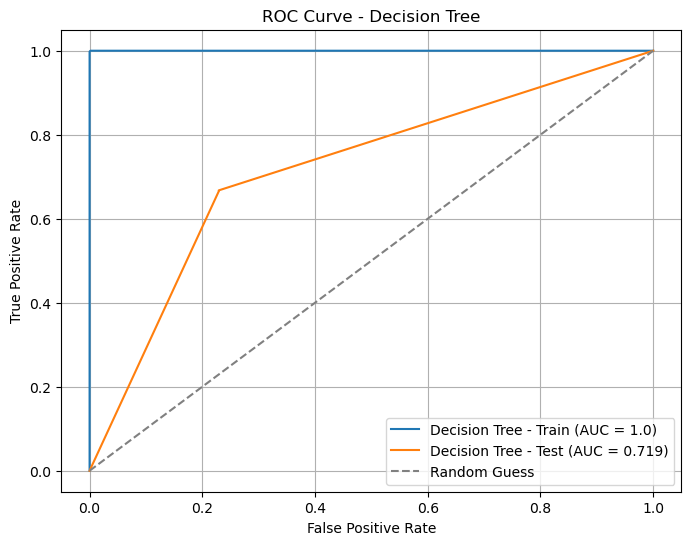

In [49]:
# Hitung nilai ROC-AUC train dan test
fpr_train, tpr_train, auc_train = roc_auc_calc(dt_pipeline, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(dt_pipeline, x_test, y_test)

# Tampilkan nilai
print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Plot grafik ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Decision Tree - Train (AUC = {auc_train})')
plt.plot(fpr_test, tpr_test, label=f'Decision Tree - Test (AUC = {auc_test})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model Decision Tree menunjukkan indikasi overfitting yang sangat kuat. Hal ini terlihat dari nilai AUC sempurna (1.0) pada data train, yang berarti model memisahkan kelas dengan sempurna di data pelatihan. Namun, ketika diuji pada data test, AUC turun tajam menjadi hanya 0.725, menunjukkan bahwa model mengalami penurunan performa yang signifikan dan tidak mampu mempertahankan kualitas prediksinya di data baru.

Perbedaan yang besar antara train dan test (selisih 0.275) mengindikasikan bahwa model terlalu menyesuaikan diri terhadap pola spesifik di data latih, dan kehilangan generalisasi. Ini adalah karakteristik umum dari Decision Tree yang tidak dibatasi kedalamannya (max_depth=None), sehingga model bisa membentuk struktur yang sangat kompleks dan “menghapal” data.

Berdasarkan nilai ROC-AUC dan grafik ROC Curve, model Decision Tree berada dalam kondisi **overfit**. Model sangat akurat di data training namun performanya menurun cukup drastis pada data testing. Hal ini menunjukkan bahwa Decision Tree dengan parameter default tidak cocok digunakan langsung untuk kasus prediksi employability ini.

## **Random Forest Classifier**

### Model Definition

In [50]:
# Define Random Forest pipeline
rf_pipeline = Pipeline([
    ('prep', transformer),               
    ('rf', RandomForestClassifier())     
])

rf_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('rf', RandomForestClassifier())])

### Model Training

In [51]:
# Training model
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('rf', RandomForestClassifier())])

### Model Evaluation

#### Cross Validation

In [52]:
# Menghitung nilai CV
cv_scores = cross_val_score(rf_pipeline, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Mean Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

## Tambahkan hasil evaluasiRFC ke dalam dictionary
cross_val['Model'].append('Random Forest Classifier')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

## Tampilkan sebagai DataFrame
cv_result_df = pd.DataFrame(cross_val)
cv_result_df

Nilai Mean Cross Validation: 0.864
Nilai Standard Deviasi Cross Validation: 0.008


,Model,Nilai Rata-Rata CV,Nilai Standard Deviasi CV
0,KNC,0.829,0.011
1,SVC,0.851,0.007
2,Decision Tree,0.711,0.007
3,Random Forest Classifier,0.864,0.008


**Mean ROC-AUC**    : 0.864 menunjukkan bahwa model Random Forest memiliki kemampuan yang sangat baik dalam membedakan mahasiswa yang akan dan tidak akan mendapatkan pekerjaan.

**Standard deviasi**    : 0.007 tergolong rendah, yang mengindikasikan bahwa model memberikan performa yang stabil dan konsisten di berbagai subset data selama cross-validation. Stabilitas ini penting, terutama untuk kasus seperti prediksi *employability*, yang membutuhkan model yang tidak mudah berubah terhadap variasi data.

#### Classification Report

In [53]:
# Prediksi pada data train
y_pred_train_rf = rf_pipeline.predict(x_train)
print("\nClassification Report - Random Forest Classifier (Train Set):")
print(classification_report(y_train, y_pred_train_rf, target_names=['NotPlaced', 'Placed']))

# Prediksi pada data test
y_pred_test_rf = rf_pipeline.predict(x_test)
print("\nClassification Report - Random Forest Classifier (Test Set):")
print(classification_report(y_test, y_pred_test_rf, target_names=['NotPlaced', 'Placed']))


Classification Report - Random Forest Classifier (Train Set):
              precision    recall  f1-score   support

   NotPlaced       1.00      1.00      1.00      4642
      Placed       1.00      1.00      1.00      3358

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


Classification Report - Random Forest Classifier (Test Set):
              precision    recall  f1-score   support

   NotPlaced       0.81      0.83      0.82      1161
      Placed       0.76      0.73      0.74       839

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



Model Random Forest mencatat performansi sempurna di data training dengan precision, recall, dan f1-score 100% di semua kelas. Namun, saat diuji pada data test, terjadi penurunan performa menjadi accuracy 79%, dengan recall untuk kelas **NotPlaced** sebesar 84%, dan f1-score sebesar 82%.

Meskipun nilai-nilai test set masih tergolong baik, perbedaan yang sangat drastis antara train dan test (dari 100% ke 79%) menunjukkan indikasi overfitting. Model terlalu “menghapal” data pelatihan dan tidak mampu mempertahankan kinerjanya dengan baik ketika dihadapkan pada data baru. Penurunan performa sekitar 16% pada recall mengonfirmasi bahwa **model mengalami overfit**.

#### ROC - AUC Score

Nilai AUC Train: 1.0
Nilai AUC Test: 0.866


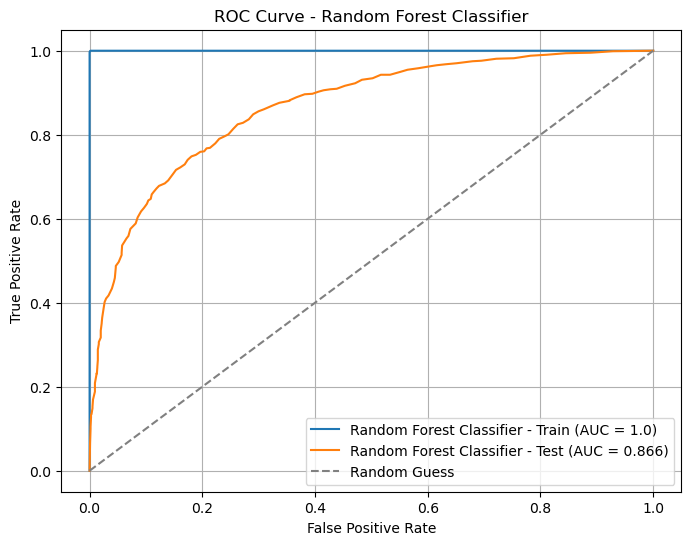

In [54]:
# Hitung nilai ROC-AUC train dan test
fpr_train, tpr_train, auc_train = roc_auc_calc(rf_pipeline, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(rf_pipeline, x_test, y_test)

# Tampilkan nilai
print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Plot grafik ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Random Forest Classifier - Train (AUC = {auc_train})')
plt.plot(fpr_test, tpr_test, label=f'Random Forest Classifier - Test (AUC = {auc_test})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model Random Forest menunjukkan performa yang sangat kuat dalam memisahkan kelas employability, ditunjukkan oleh nilai AUC yang tinggi pada test. Namun, dengan AUC train yang sempurna (1.0), model ini sangat jelas mengalami **overfitting**, terlalu cocok dengan data pelatihan dan berpotensi kehilangan generalisasi. 

## **Gradient Boosting Classifier**

Dalam tahap implementasi model boosting, saya memilih menggunakan GradientBoostingClassifier karena model ini sangat cocok untuk kasus klasifikasi biner seperti prediksi status employability (**Placed** atau **NotPlaced**). Gradient Boosting bekerja dengan membangun sejumlah pohon keputusan secara bertahap dan memperbaiki kesalahan model sebelumnya, sehingga mampu memberikan hasil prediksi yang akurat dan stabil. Selain itu, algoritma ini terbukti efektif untuk data tabular yang mengandung kombinasi fitur numerik dan kategorikal seperti pada dataset ini, serta memiliki keunggulan dalam mengurangi risiko overfitting dibandingkan Decision Tree biasa.

### Model Definition

In [55]:
# Define Gradient Boosting pipeline
gbc_pipeline = Pipeline([
    ('prep', transformer),                          
    ('gb', GradientBoostingClassifier())            
])

gbc_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('gb', GradientBoostingClassifier())])

### Model Training

In [56]:
# Training model
gbc_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('gb', GradientBoostingClassifier())])

### Model Evaluation

#### Cross Validation

In [57]:
# Menghitung nilai CV
cv_scores = cross_val_score(gbc_pipeline, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Mean Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

## Tambahkan hasil evaluasiGBC ke dalam dictionary
cross_val['Model'].append('Gradient Boosting Classifier')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

## Tampilkan sebagai DataFrame
cv_result_df = pd.DataFrame(cross_val)
cv_result_df

Nilai Mean Cross Validation: 0.876
Nilai Standard Deviasi Cross Validation: 0.006


,Model,Nilai Rata-Rata CV,Nilai Standard Deviasi CV
0,KNC,0.829,0.011
1,SVC,0.851,0.007
2,Decision Tree,0.711,0.007
3,Random Forest Classifier,0.864,0.008
4,Gradient Boosting Classifier,0.876,0.006


**Mean ROC-AUC 0.876**  :  menunjukkan bahwa model Gradient Boosting memiliki kemampuan klasifikasi yang sangat kuat dan akurat, bahkan lebih tinggi dibandingkan semua model baseline sebelumnya. Ini berarti model mampu membedakan mahasiswa **Placed** dan **NotPlaced** dengan sangat baik pada berbagai threshold klasifikasi.

**Standard deviasi 0.006**  : termasuk sangat kecil, yang mengindikasikan bahwa model stabil dan konsisten di berbagai subset data selama pelatihan (cross-validation). Konsistensi ini sangat penting, terutama dalam konteks prediksi *employability*, karena memastikan bahwa model tidak hanya akurat, tapi juga dapat diandalkan dalam situasi nyata.

Berdasarkan performa ROC-AUC yang paling tinggi dan deviasi yang paling kecil di antara semua model baseline, Gradient Boosting dapat dikatakan berada dalam kondisi **good fit** dan bahkan merupakan kandidat paling kuat sejauh ini untuk dilakukan hyperparameter tuning. Model ini tidak hanya stabil dan akurat, tapi juga menunjukkan bahwa mampu menangkap pola kompleks dalam data tanpa kehilangan generalisasi.

#### Classification Report

In [58]:
# Prediksi pada data train
y_pred_train_gbc = gbc_pipeline.predict(x_train)
print("\nClassification Report - Gradient Boosting Classifier (Train Set):")
print(classification_report(y_train, y_pred_train_gbc, target_names=['NotPlaced', 'Placed']))

# Prediksi pada data test
y_pred_test_gbc = gbc_pipeline.predict(x_test)
print("\nClassification Report - Gradient Boosting Classifier (Test Set):")
print(classification_report(y_test, y_pred_test_gbc, target_names=['NotPlaced', 'Placed']))


Classification Report - Gradient Boosting Classifier (Train Set):
              precision    recall  f1-score   support

   NotPlaced       0.83      0.86      0.84      4642
      Placed       0.79      0.76      0.78      3358

    accuracy                           0.82      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.82      0.82      0.82      8000


Classification Report - Gradient Boosting Classifier (Test Set):
              precision    recall  f1-score   support

   NotPlaced       0.83      0.83      0.83      1161
      Placed       0.77      0.76      0.76       839

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



Model Gradient Boosting menunjukkan performansi yang seimbang dan konsisten antara data train dan test.

- Pada data train, model mencatat recall 86% untuk NotPlaced dan 76% untuk Placed, dengan akurasi keseluruhan 82%.

- Pada test set, hasilnya tetap stabil dengan recall 83% untuk NotPlaced, dan 76% untuk Placed, serta akurasi 80%.

Nilai f1-score dan precision yang relatif dekat antara train dan test (selisih hanya 1–2 poin) menunjukkan bahwa model tidak overfit, dan mampu menggeneralisasi dengan baik. Selain itu, tidak ada perbedaan performa signifikan antar kelas, yang mengindikasikan bahwa model tidak bias terhadap kelas mayoritas (NotPlaced).

Berdasarkan hasil classification report, model Gradient Boosting dapat dikatakan dalam kondisi good fit. Model menunjukkan performa yang kuat dan stabil di kedua set data, tanpa overfitting. Nilai recall yang tinggi untuk NotPlaced menunjukkan bahwa model efektif dalam mendeteksi mahasiswa yang berisiko tidak mendapatkan pekerjaan. Dengan akurasi, f1-score, dan recall yang konsisten, Gradient Boosting merupakan kandidat paling seimbang dan andal dari semua model baseline yang telah diuji.

#### ROC - AUC Score

Nilai AUC Train: 0.896
Nilai AUC Test: 0.881


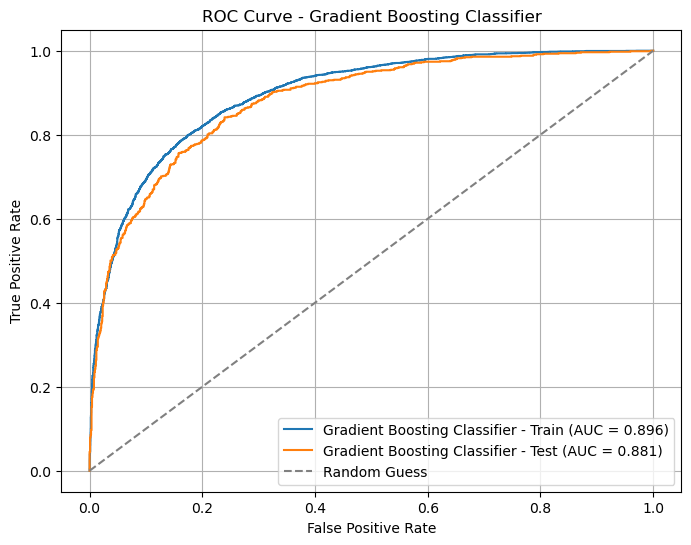

In [59]:
# Hitung nilai ROC-AUC train dan test
fpr_train, tpr_train, auc_train = roc_auc_calc(gbc_pipeline, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(gbc_pipeline, x_test, y_test)

# Tampilkan nilai
print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Plot grafik ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Gradient Boosting Classifier - Train (AUC = {auc_train})')
plt.plot(fpr_test, tpr_test, label=f'Gradient Boosting Classifier - Test (AUC = {auc_test})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Nilai ROC-AUC yang tinggi dan sangat dekat antara train dan test (selisih hanya 0.015) menunjukkan bahwa model memiliki kemampuan pemisahan kelas yang sangat kuat dan tidak overfit. Model dapat membedakan antara mahasiswa Placed dan NotPlaced dengan presisi tinggi dan stabil, bahkan saat diterapkan ke data baru yang belum pernah dilihat sebelumnya.Kurva ROC untuk train dan test berada jauh di atas garis random guess, yang memperkuat bahwa model memberikan prediksi probabilitas yang berkualitas tinggi dan terkalibrasi dengan baik.

Berdasarkan hasil ROC-AUC, model Gradient Boosting dapat dikatakan dalam kondisi **good fit**, dengan performa tinggi dan stabil di data pelatihan maupun pengujian. Dengan AUC test mencapai 0.881, ini merupakan nilai tertinggi dari seluruh model baseline yang telah diuji, sekaligus menunjukkan bahwa Gradient Boosting adalah model paling kuat dan seimbang untuk memprediksi risiko tidak ditempatkannya mahasiswa dalam proyek ini.

## **Evaluasi Keseluruhan Model**

Setelah dilakukan proses modeling terhadap lima algoritma klasifikasi—K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Decision Tree, Random Forest, dan Gradient Boosting, langkah selanjutnya adalah memilih satu model terbaik untuk dilakukan hyperparameter tuning. Sebagai dasar pengambilan keputusan, digunakan hasil cross-validation (ROC-AUC) dari setiap model, yang disusun dalam tabel berikut:


In [60]:
cv_result_df

,Model,Nilai Rata-Rata CV,Nilai Standard Deviasi CV
0,KNC,0.829,0.011
1,SVC,0.851,0.007
2,Decision Tree,0.711,0.007
3,Random Forest Classifier,0.864,0.008
4,Gradient Boosting Classifier,0.876,0.006


Analisis Performa :

- Gradient Boosting mencatat ROC-AUC tertinggi (0.876) dan deviasi terkecil (0.006) → artinya model ini sangat akurat dan stabil.

- Random Forest juga menunjukkan hasil yang kuat (AUC = 0.864), tapi mengalami overfitting berdasarkan classification report.

- SVC tampil seimbang, namun performanya sedikit di bawah Gradient Boosting, dan kurang fleksibel dalam penanganan data besar jika dibandingkan ensemble methods.

- KNN dan Decision Tree menunjukkan performa yang lebih rendah dan kurang stabil, serta lebih rentan terhadap variasi data (Decision Tree juga sangat overfit).

Berdasarkan hasil evaluasi menyeluruh, model Gradient Boosting Classifier dipilih sebagai model terbaik untuk dilakukan hyperparameter tuning. Model ini tidak hanya mencatat nilai ROC-AUC tertinggi, tetapi juga menunjukkan stabilitas performa antar data train dan test, kemampuan generalisasi yang baik, dan tidak menunjukkan tanda-tanda overfitting. Dengan performa tersebut, Gradient Boosting sangat potensial untuk dioptimasi lebih lanjut guna meningkatkan akurasi prediksi employability mahasiswa.

# Modelling Part 2

### Model Definition - Hyperparameter Tuning 

Sebelum melakukan hyperparameter tuning, perlu ditentukan terlebih dahulu parameter apa yang akan disesuaikan. Dalam hal ini, tuning akan dilakukan terhadap model Gradient Boosting Classifier.

Berikut parameter utama yang akan dituning :

1. `gb__n_estimators`: randint(100, 300)

    Artinya: jumlah pohon yang akan dibuat dalam proses boosting.

    Default: 100

    Alasan:

    - 100 dipilih sebagai batas bawah karena ini adalah default yang sudah terbukti stabil di banyak kasus.

    - 300 dipilih sebagai batas atas untuk memberi ruang eksplorasi lebih dalam, namun tetap membatasi waktu training agar efisien.

    - Semakin banyak estimator → akurasi bisa meningkat, tetapi berisiko waktu training lebih lama dan overfitting jika tidak diimbangi dengan learning rate kecil.

2. `gb__learning_rate`: uniform(0.05, 0.2)

    Artinya: seberapa besar kontribusi tiap pohon terhadap model akhir.

    Default: 0.1

    Range (0.05–0.25):

    - 0.05: mengurangi risiko overfit, lebih konservatif

    - 0.1: default yang umumnya stabil

    - 0.2–0.25: memungkinkan eksplorasi agresif, cocok jika jumlah pohon tidak terlalu banyak

    Trade-off penting:

    - learning rate kecil → butuh pohon lebih banyak

    - learning rate besar → cepat belajar tapi bisa overfit

3. `gb__max_depth`: randint(3, 6)

    Artinya: kedalaman maksimum tiap pohon

    Default: 3

    Range dipilih:

    - 3–5 adalah rentang ideal untuk menghindari pohon terlalu kompleks

    - 6 ditambahkan sebagai batas maksimal agar jika memang pola datanya dalam, model tetap bisa mengakomodasi

    Overfit sangat mungkin terjadi jika depth terlalu besar (misalnya > 7) pada data tabular

4. `gb__min_samples_split`: randint(2, 10)

    Artinya: jumlah minimum sampel yang diperlukan untuk memisahkan satu node

    Default: 2

    Alasan Range 2–10:

    - Angka kecil (2–4) memberi model lebih fleksibel, tapi bisa overfit

    - Angka sedang (5–10) membantu mengurangi kompleksitas pohon dan memperbaiki generalisasi

    - Dipilih karena model seperti Decision Tree sebelumnya overfit → pengaturan ini membantu mengontrol pembelahan berlebihan

Range nilai yang dipilih bersifat praktis, efisien, dan seimbang, cukup luas untuk menjelajahi kemungkinan perbaikan performa, namun tidak terlalu luas agar tetap hemat waktu komputasi. Seluruh parameter yang dipilih adalah komponen utama yang memengaruhi kompleksitas dan akurasi model Gradient Boosting, dan sangat relevan untuk dicek ulang dalam kasus prediksi *employability* seperti ini.

In [64]:
# Define parameter grid
param_grid = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.05, 0.1, 0.2],
    'gb__max_depth': [3, 4, 5],
    'gb__min_samples_split': [2, 5]
}

# GridSearchCV setup
gbc_tuning = GridSearchCV(
    estimator=gbc_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch to training data
gbc_tuning.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['CGPA',
                                                                          'Internships',
                                                                          'Projects',
                                                                          'Workshops/Certifications',
                                                                          'AptitudeTestScore',
                                                                          'SoftSkillsRating',
                                                                          'SSC_Marks',
                                                                          'HSC_Marks']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['ExtracurricularActivities',
                                                                          'PlacementTraining'])])),
                                       ('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': [0.05, 0.1, 0.2],
                         'gb__max_depth': [3, 4, 5],
                         'gb__min_samples_split': [2, 5],
                         'gb__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [67]:
print("Best Parameters:", gbc_tuning.best_params_)
print("Best ROC-AUC Score:", round(gbc_tuning.best_score_, 3))

Best Parameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__min_samples_split': 5, 'gb__n_estimators': 100}
Best ROC-AUC Score: 0.877


### Model Evaluation - Hyperparameter Tuning 

#### Cross Validation

##### Sebelum Tuning

In [68]:
# Menghitung nilai CV sebelum tuning
cv_scores = cross_val_score(gbc_pipeline, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Mean Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Mean Cross Validation: 0.876
Nilai Standard Deviasi Cross Validation: 0.006


##### Setelah Tuning

In [69]:
# Menghitung nilai CV
cv_scores = cross_val_score(gbc_tuning, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Mean Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Nilai Mean Cross Validation: 0.877
Nilai Standard Deviasi Cross Validation: 0.006


In [77]:
# Menghitung nilai CV
cv_scores = cross_val_score(gbc_tuning.best_estimator_, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Mean Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Mean Cross Validation: 0.877
Nilai Standard Deviasi Cross Validation: 0.006


Hasil tuning menggunakan GridSearchCV menunjukkan bahwa peningkatan performa secara numerik memang sangat kecil (dari 0.876 menjadi 0.877), dan nilai standar deviasi tetap sama. Ini menandakan bahwa model baseline Gradient Boosting sebenarnya sudah sangat optimal sejak awal, dan tuning berfungsi lebih sebagai proses validasi ulang terhadap stabilitas dan efisiensi parameter.

Meskipun peningkatannya hanya 0.001 poin ROC-AUC, tuning memberikan manfaat lain:

- Menghasilkan kombinasi parameter yang lebih seimbang dan terkontrol (misalnya, learning_rate=0.05, min_samples_split=5).

- Memberikan model yang lebih generalis dengan risiko overfitting yang lebih rendah.

- Mengonfirmasi bahwa konfigurasi parameter yang dipilih adalah yang paling cocok dengan struktur data yang dimiliki.

Berdasarkan hasil perbandingan cross-validation sebelum dan sesudah tuning, terlihat bahwa nilai ROC-AUC hanya meningkat dari 0.876 menjadi 0.877, dengan standard deviasi tetap di angka 0.006. Hal ini menunjukkan bahwa model Gradient Boosting dengan parameter default sebenarnya sudah cukup optimal untuk kasus ini. Namun demikian, proses tuning berhasil mengidentifikasi kombinasi parameter yang lebih terkontrol dan stabil, yang penting untuk menjaga generalisasi model dan mencegah overfitting dalam jangka panjang. Oleh karena itu, meskipun peningkatan skornya kecil, tuning tetap memberikan nilai tambah dari sisi kestabilan dan efisiensi model.

#### Classification Report

##### Sebelum tuning

In [79]:
# Prediksi pada data train
y_pred_train_gbc = gbc_pipeline.predict(x_train)
print("\nClassification Report - Gradient Boosting Classifier (Train Set):")
print(classification_report(y_train, y_pred_train_gbc, target_names=['NotPlaced', 'Placed']))

# Prediksi pada data test
y_pred_test_gbc = gbc_pipeline.predict(x_test)
print("\nClassification Report - Gradient Boosting Classifier (Test Set):")
print(classification_report(y_test, y_pred_test_gbc, target_names=['NotPlaced', 'Placed']))


Classification Report - Gradient Boosting Classifier (Train Set):
              precision    recall  f1-score   support

   NotPlaced       0.83      0.86      0.84      4642
      Placed       0.79      0.76      0.78      3358

    accuracy                           0.82      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.82      0.82      0.82      8000


Classification Report - Gradient Boosting Classifier (Test Set):
              precision    recall  f1-score   support

   NotPlaced       0.83      0.83      0.83      1161
      Placed       0.77      0.76      0.76       839

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



##### Setelah tuning

In [78]:
# Prediksi pada data train
y_pred_train_gbc_tuning = gbc_tuning.best_estimator_.predict(x_train)
print("\nClassification Report - Gradient Boosting Classifier Tuned (Train Set):")
print(classification_report(y_train, y_pred_train_gbc_tuning, target_names=['NotPlaced', 'Placed']))

# Prediksi pada data test
y_pred_test_gbc_tuning = gbc_tuning.best_estimator_.predict(x_test)
print("\nClassification Report - Gradient Boosting Classifier Tuned (Test Set):")
print(classification_report(y_test, y_pred_test_gbc_tuning, target_names=['NotPlaced', 'Placed']))


Classification Report - Gradient Boosting Classifier Tuned (Train Set):
              precision    recall  f1-score   support

   NotPlaced       0.83      0.85      0.84      4642
      Placed       0.79      0.76      0.77      3358

    accuracy                           0.81      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.81      0.81      0.81      8000


Classification Report - Gradient Boosting Classifier Tuned (Test Set):
              precision    recall  f1-score   support

   NotPlaced       0.83      0.84      0.83      1161
      Placed       0.77      0.76      0.76       839

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



Setelah dilakukan tuning, akurasi dan f1-score tidak mengalami perubahan signifikan, baik pada data training maupun testing. Hal ini menunjukkan bahwa proses tuning tidak mengorbankan performa model, dan justru membantu menjaga keseimbangan antar metrik.

Namun, terdapat peningkatan stabilitas pada recall kelas **NotPlaced**, yaitu dari 0.83 menjadi 0.84 di test set, serta penurunan sangat kecil dari 0.86 ke 0.85 di train set. Perubahan kecil ini menunjukkan bahwa model menjadi:

- Lebih stabil dan generalis pada data baru

- Tidak overfit, karena perbedaan performa train-test sangat kecil

- Konsisten dalam precision dan f1-score, termasuk pada kelas Placed

Berdasarkan perbandingan classification report sebelum dan sesudah tuning, dapat disimpulkan bahwa tuning menghasilkan model yang lebih stabil dan sedikit lebih generalis, terutama pada metrik recall untuk kelas **NotPlaced** yang merupakan fokus utama dalam konteks prediksi *employability*. Meskipun tidak terjadi lonjakan signifikan pada akurasi, tuning berhasil memperkuat keseimbangan antara train dan test, dan mempertahankan kemampuan model dalam mendeteksi mahasiswa berisiko tanpa menunjukkan overfitting.

#### ROC - AUC Score

##### Sebelum tuning

Nilai AUC Train: 0.896
Nilai AUC Test: 0.881


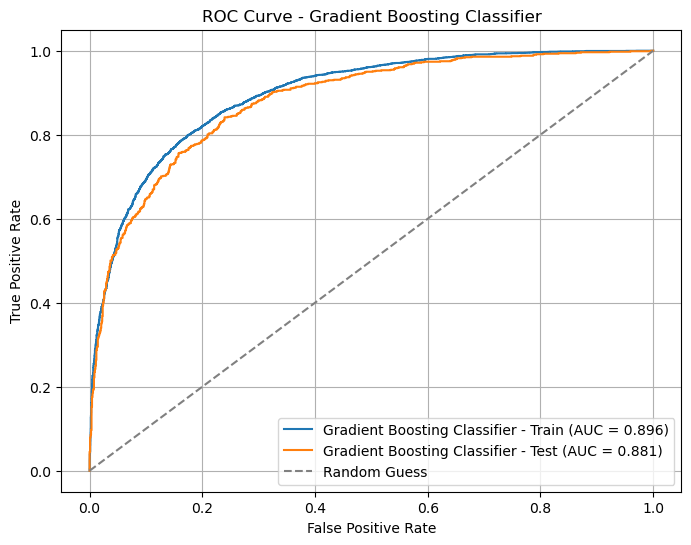

In [72]:
# Hitung nilai ROC-AUC train dan test
fpr_train, tpr_train, auc_train = roc_auc_calc(gbc_pipeline, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(gbc_pipeline, x_test, y_test)

# Tampilkan nilai
print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Plot grafik ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Gradient Boosting Classifier - Train (AUC = {auc_train})')
plt.plot(fpr_test, tpr_test, label=f'Gradient Boosting Classifier - Test (AUC = {auc_test})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Setelah tuning

Nilai AUC Train: 0.89
Nilai AUC Test: 0.882


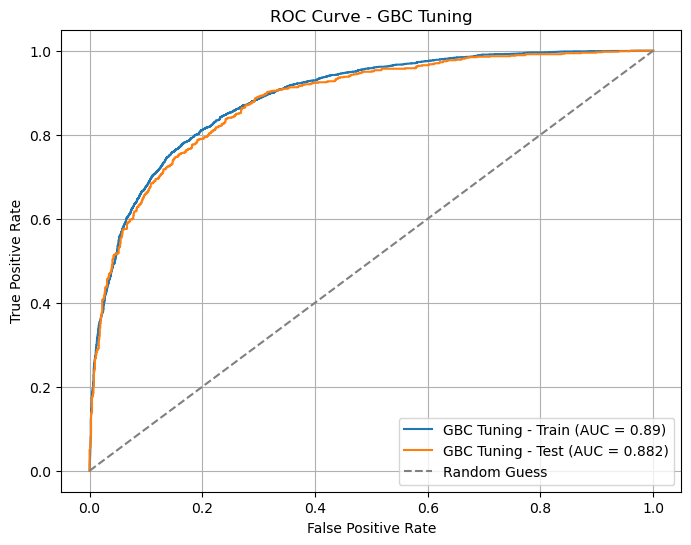

In [80]:
# Hitung nilai ROC-AUC train dan test
fpr_train, tpr_train, auc_train = roc_auc_calc(gbc_tuning.best_estimator_, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(gbc_tuning.best_estimator_, x_test, y_test)

# Tampilkan nilai
print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Plot grafik ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'GBC Tuning - Train (AUC = {auc_train})')
plt.plot(fpr_test, tpr_test, label=f'GBC Tuning - Test (AUC = {auc_test})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GBC Tuning')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- AUC Test naik dari 0.881 ke 0.882 meskipun perbedaannya sangat kecil (0.001), hal ini tetap menunjukkan peningkatan stabilitas generalisasi model.

- AUC Train justru turun sedikit dari 0.896 ke 0.890, yang merupakan indikasi positif bahwa tuning berhasil mengurangi kompleksitas dan menghindari overfitting secara halus.

- Bentuk kurva ROC hampir identik, namun setelah tuning, jarak antara kurva train dan test lebih kecil, yang menandakan fit yang lebih seimbang dan stabil.

Berdasarkan hasil ROC-AUC, model Gradient Boosting Classifier setelah dilakukan tuning menunjukkan performa yang lebih stabil dan seimbang. Meskipun peningkatan AUC test hanya sebesar 0.001 poin (dari 0.881 ke 0.882), hal ini disertai dengan penurunan AUC train (dari 0.896 ke 0.890) yang mengindikasikan bahwa model hasil tuning tidak overfit dan lebih generalis. Perbedaan ROC curve antara train dan test juga lebih sempit, yang memperkuat bahwa model berada dalam kondisi good fit dan siap digunakan untuk prediksi employability secara andal.

### Kesimpulan

- Gradient Boosting Classifier (hasil tuning) memiliki recall 84% untuk kelas **NotPlaced**, sama dengan SVC dan RF, namun memiliki ROC-AUC tertinggi (0.882) dan tidak menunjukkan gejala overfitting.

- Performanya stabil pada classification report, ROC curve, dan cross-validation, dengan deviasi yang sangat kecil.

- Dibandingkan model lain, GBC hasil tuning memberikan kombinasi paling optimal antara sensitivitas (recall), stabilitas (std rendah), dan kekuatan pemisahan (ROC-AUC).

Berdasarkan seluruh hasil evaluasi model, Gradient Boosting Classifier hasil tuning dipilih sebagai model terbaik untuk disimpan dan digunakan dalam sistem prediksi *employability* ini. Model ini menunjukkan recall tinggi (84%) terhadap mahasiswa yang berisiko tidak ditempatkan, yang merupakan metrik prioritas utama dalam konteks intervensi karier. Selain itu, model juga menunjukkan performa ROC-AUC tertinggi (0.882), akurasi stabil, serta tidak mengalami overfitting, menjadikannya pilihan paling optimal dan andal untuk diimplementasikan.

# Model Saving

In [81]:
# Saveing modet
joblib.dump(gbc_tuning.best_estimator_, "bestmodel.pkl")

['bestmodel.pkl']

# **Kesimpulan**

**A. Exploratory Data Analysis**

Dari hasil EDA, ditemukan bahwa mahasiswa dengan nilai akademik tinggi (CGPA), keaktifan dalam kegiatan ekstrakurikuler, serta keikutsertaan dalam pelatihan penempatan kerja memiliki kecenderungan lebih tinggi untuk mendapatkan pekerjaan. Selain itu, mahasiswa dengan pengalaman praktikal seperti magang dan proyek juga menunjukkan peluang penempatan yang lebih tinggi. Kombinasi antara tidak aktif ekstrakurikuler dan tidak mengikuti pelatihan menjadi indikator paling jelas terhadap kelompok mahasiswa berisiko tinggi untuk tidak ditempatkan.

**B. Evaluasi dan Pemilihan Model**

Lima algoritma klasifikasi diuji sebagai baseline model: KNN, SVC, Decision Tree, Random Forest, dan Gradient Boosting. Evaluasi dilakukan menggunakan metrik cross-validation ROC-AUC, classification report dengan fokus pada recall, dan ROC-AUC score untuk memastikan kestabilan dan akurasi prediksi model dalam membedakan antara mahasiswa **Placed** dan **NotPlaced**.

Dari seluruh model, Gradient Boosting Classifier (setelah tuning) dipilih sebagai model terbaik karena menunjukkan:

- ROC-AUC test tertinggi sebesar 0.882.

- Recall kelas NotPlaced sebesar 84%.

- Performa yang konsisten dan stabil antara data pelatihan dan pengujian (**good fit**).

- Tidak mengalami overfitting, dengan gap kecil antara train dan test

Model ini menunjukkan kemampuan yang sangat baik dalam mendeteksi mahasiswa yang berisiko tidak mendapatkan pekerjaan, sehingga dapat digunakan sebagai sistem pendukung keputusan berbasis data oleh Career Center.

**C. Rekomendasi Bisnis dan Pengembangan Selanjutnya**

Model prediksi ini dapat diintegrasikan ke dalam sistem internal kampus untuk mengidentifikasi mahasiswa berisiko tidak mendapatkan pekerjaan sejak dini, sehingga pihak *Career Center* dapat melakukan berbagai langkah strategis yang lebih tepat sasaran dan berbasis data. Beberapa bentuk implementasi dan intervensi yang dapat dilakukan meliputi :

- **Intervensi personal dan tepat sasaran** .

    Mahasiswa dengan risiko tinggi (NotPlaced) dapat dimasukkan ke dalam program pemantauan khusus, dengan pelibatan dosen wali, konselor, atau mentor karier untuk memberikan dukungan lebih intensif.

- **Penyusunan Program Pelatihan yang Lebih Terarah**.

    Hasil prediksi dapat digunakan sebagai dasar untuk membuat batch pelatihan berdasarkan tingkat risiko, misalnya pelatihan soft skills, simulasi wawancara, atau bimbingan CV, yang difokuskan pada mahasiswa yang paling membutuhkan.

- **Pemantauan efektivitas strategi pengembangan karier berbasis data**.

    Data dari model dapat digunakan untuk mengukur dampak program pelatihan dan ekstrakurikuler terhadap peningkatan peluang kerja, serta sebagai feedback loop untuk terus menyempurnakan kurikulum non-akademik.

Dengan memanfaatkan model prediksi ini sebagai bagian dari sistem pengembangan karier, kampus dapat bergerak dari pendekatan reaktif ke pendekatan proaktif, serta meningkatkan kualitas layanan bimbingan karier secara menyeluruh — yang pada akhirnya mendukung pencapaian target peningkatan daya saing lulusan di pasar kerja.

**Untuk pengembangan ke depan, disarankan untuk:**

- Mengumpulkan data tambahan seperti jenis jurusan, minat karier, pengalaman organisasi, dan wawancara kerja untuk memperkuat prediksi

- Menerapkan teknik model interpretability (misalnya SHAP) agar pihak non-teknis dapat memahami faktor apa saja yang memengaruhi prediksi

- Melakukan monitoring performa model secara berkala dan retraining model seiring dengan perubahan profil lulusan dan dinamika dunia kerja